<a href="https://colab.research.google.com/github/maximalsteel/Data-Analysis-and-Dashboard-Using-Ms-Excel/blob/main/Spotify_Popularity_Model_Building_By_Divyansh_Taneja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://miro.medium.com/v2/resize:fit:1200/1*2Za21ioXcwtKhaFjlAacTQ.jpeg" width="500" height="250"/>
</p></center>

<center><font size=10>Predicting Spotify Song Popularity</center></font>
<center><font size=6>CAPSTONE PROJECT</center></font>

---



---



### ***Introduction***


> In the modern music industry, the ability to predict a song's popularity can be a game-changer for artists, producers, and marketers. Streaming platforms like Spotify have revolutionized music consumption, providing a global stage for artists to showcase their work. However, with millions of tracks vying for attention, understanding what makes a song popular is crucial for achieving success. By analyzing various audio features and metadata of songs, it is possible to uncover patterns and trends that contribute to their popularity.


### ***Problem Statement***

> Develop an advanced classification model to predict the popularity category of Spotify songs based on audio features and metadata to assist artists, producers, and music marketers in making data-driven decisions to optimize their content and promotional strategies.

### ***Project Summary***


> This project aims to develop a machine learning model to predict the popularity category of Spotify songs based on detailed audio features and metadata. By categorizing songs into different popularity bins, we can offer valuable insights that help stakeholders in the music industry make informed decisions. Whether it's refining a track's production elements, optimizing marketing campaigns, or curating playlists, the ability to foresee a song's potential popularity can significantly enhance strategic planning and execution.






# **ETL Process:** Initiating Our Data Journey.

---



### **Extract:** Gathering Raw Data


> Data for this project will be gathered using the Spotify API. The API allows access to a wide range of song attributes, including track ID, artist, album, track name, popularity, duration, explicit content indicator, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time signature, and genre. This rich dataset will form the foundation for our analysis and model building.



In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
! pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 10.8 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

# Define your credentials
client_id = 'bfdd20ad6cef4129a85f6bd0e1828d1b'
client_secret = '9140fb35be944f2782969cf1fc0abe41'

# Set up authorization
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Function to get track details
def get_track_details(track_id, genre):
    try:
        track = sp.track(track_id)
        features = sp.audio_features(track_id)[0]

        # Get popularity metrics (streams/downloads if available)
        popularity = sp.track(track_id)['popularity']

        return {
            'track_id': track['id'],
            'artist': track['artists'][0]['name'],
            'album': track['album']['name'],
            'track_name': track['name'],
            'popularity': popularity,
            'duration_ms': features['duration_ms'],
            'explicit': track['explicit'],
            'danceability': features['danceability'],
            'energy': features['energy'],
            'key': features['key'],
            'loudness': features['loudness'],
            'mode': features['mode'],
            'speechiness': features['speechiness'],
            'acousticness': features['acousticness'],
            'instrumentalness': features['instrumentalness'],
            'liveness': features['liveness'],
            'valence': features['valence'],
            'tempo': features['tempo'],
            'time_signature': features['time_signature'],
            'genre': genre,
        }
    except Exception as e:
        print(f"Error getting details for track ID {track_id}: {e}")
        return None

# Function to search and collect tracks
def collect_tracks(query, year_start, year_end, max_tracks_to_collect):
    all_tracks = []
    limit = 50  # Max tracks per request
    total_collected = 0

    for year in range(year_start, year_end + 1):
        for offset in range(0, max_tracks_to_collect, limit):
            try:
                results = sp.search(q=f'{query} year:{year}', type='track', limit=limit, offset=offset)
                if not results['tracks']['items']:
                    break

                track_ids = [track['id'] for track in results['tracks']['items']]
                track_data = [get_track_details(track_id, query) for track_id in track_ids if get_track_details(track_id, query) is not None]
                all_tracks.extend(track_data)
                total_collected += len(track_data)

                # Print progress
                print(f"Collected {total_collected} tracks so far.")

                # Check if we have collected enough tracks
                if total_collected >= max_tracks_to_collect:
                    return all_tracks

                # Respect rate limits
                time.sleep(1)

            except Exception as e:
                print(f"An error occurred: {e}")
                time.sleep(5)  # Wait a bit before retrying

    return all_tracks

# Collect data using different queries (genres)
queries = ['Tamil', 'Telugu', 'Kannada','Bollywood', 'Indian pop']
year_start = 2019
year_end = 2023
max_tracks_to_collect = 200  # Set the maximum number of tracks to collect

all_track_data = []

for query in queries:
    print(f"Collecting up to {max_tracks_to_collect} tracks for query: {query}")
    track_data = collect_tracks(query, year_start, year_end, max_tracks_to_collect // len(queries))
    all_track_data.extend(track_data)

    # Check if we have collected enough tracks
    if len(all_track_data) >= max_tracks_to_collect:
        break

# Convert to pandas DataFrame for easy manipulation
valid_track_data = [track for track in all_track_data if track is not None]
df = pd.DataFrame(valid_track_data)

# Save to CSV
df.to_csv('/content/drive/MyDrive/Capstone/indian_spotify_tracks_.csv', index=False)
print(f"Saved {len(df)} collected tracks to indian_spotify_tracks_.csv")


Collected 50 tracks so far.
Collected 50 tracks so far.
Collected 50 tracks so far.
Collected 50 tracks so far.
Saved 200 collected tracks to indian_spotify_tracks_.csv


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

# Define your credentials
client_id = 'bfdd20ad6cef4129a85f6bd0e1828d1b'
client_secret = '9140fb35be944f2782969cf1fc0abe41'

# Set up authorization
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Function to get track details
def get_track_details(track_id, genre):
    try:
        track = sp.track(track_id)
        features = sp.audio_features(track_id)[0]

        # Get popularity metrics (streams/downloads if available)
        popularity = sp.track(track_id)['popularity']

        return {
            'track_id': track['id'],
            'artist': track['artists'][0]['name'],
            'album': track['album']['name'],
            'track_name': track['name'],
            'popularity': popularity,
            'duration_ms': features['duration_ms'],
            'explicit': track['explicit'],
            'danceability': features['danceability'],
            'energy': features['energy'],
            'key': features['key'],
            'loudness': features['loudness'],
            'mode': features['mode'],
            'speechiness': features['speechiness'],
            'acousticness': features['acousticness'],
            'instrumentalness': features['instrumentalness'],
            'liveness': features['liveness'],
            'valence': features['valence'],
            'tempo': features['tempo'],
            'time_signature': features['time_signature'],
            'genre': genre,
        }
    except Exception as e:
        print(f"Error getting details for track ID {track_id}: {e}")
        return None

# Function to search and collect tracks
def collect_tracks(query, year_start, year_end, max_tracks_to_collect):
    all_tracks = []
    limit = 50  # Max tracks per request
    total_collected = 0

    for year in range(year_start, year_end + 1):
        for offset in range(0, max_tracks_to_collect, limit):
            try:
                results = sp.search(q=f'{query} year:{year}', type='track', limit=limit, offset=offset)
                if not results['tracks']['items']:
                    break

                track_ids = [track['id'] for track in results['tracks']['items']]
                track_data = [get_track_details(track_id, query) for track_id in track_ids if get_track_details(track_id, query) is not None]
                all_tracks.extend(track_data)
                total_collected += len(track_data)

                # Print progress
                print(f"Collected {total_collected} tracks so far.")

                # Check if we have collected enough tracks
                if total_collected >= max_tracks_to_collect:
                    return all_tracks

                # Respect rate limits
                time.sleep(1)

            except Exception as e:
                print(f"An error occurred: {e}")
                time.sleep(5)  # Wait a bit before retrying

    return all_tracks

# Collect data using different queries (genres)
queries = ['Rap','Romance']
year_start = 2019
year_end = 2023
max_tracks_to_collect = 200  # Set the maximum number of tracks to collect

all_track_data = []

for query in queries:
    print(f"Collecting up to {max_tracks_to_collect} tracks for query: {query}")
    track_data = collect_tracks(query, year_start, year_end, max_tracks_to_collect // len(queries))
    all_track_data.extend(track_data)

    # Check if we have collected enough tracks
    if len(all_track_data) >= max_tracks_to_collect:
        break

# Convert to pandas DataFrame for easy manipulation
valid_track_data = [track for track in all_track_data if track is not None]
df = pd.DataFrame(valid_track_data)

# Save to CSV
df.to_csv('/content/drive/MyDrive/Capstone/indian_spotify_tracks_1.csv', index=False)
print(f"Saved {len(df)} collected tracks to indian_spotify_tracks_1.csv")


Collected 50 tracks so far.
Collected 100 tracks so far.
Collected 50 tracks so far.
Collected 100 tracks so far.
Saved 200 collected tracks to indian_spotify_tracks_1.csv


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

# Define your credentials
client_id = 'bfdd20ad6cef4129a85f6bd0e1828d1b'
client_secret = '9140fb35be944f2782969cf1fc0abe41'

# Set up authorization
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Function to get track details
def get_track_details(track_id, genre):
    try:
        track = sp.track(track_id)
        features = sp.audio_features(track_id)[0]

        # Get popularity metrics (streams/downloads if available)
        popularity = sp.track(track_id)['popularity']

        return {
            'track_id': track['id'],
            'artist': track['artists'][0]['name'],
            'album': track['album']['name'],
            'track_name': track['name'],
            'popularity': popularity,
            'duration_ms': features['duration_ms'],
            'explicit': track['explicit'],
            'danceability': features['danceability'],
            'energy': features['energy'],
            'key': features['key'],
            'loudness': features['loudness'],
            'mode': features['mode'],
            'speechiness': features['speechiness'],
            'acousticness': features['acousticness'],
            'instrumentalness': features['instrumentalness'],
            'liveness': features['liveness'],
            'valence': features['valence'],
            'tempo': features['tempo'],
            'time_signature': features['time_signature'],
            'genre': genre,
        }
    except Exception as e:
        print(f"Error getting details for track ID {track_id}: {e}")
        return None

# Function to search and collect tracks
def collect_tracks(query, year_start, year_end, max_tracks_to_collect):
    all_tracks = []
    limit = 50  # Max tracks per request
    total_collected = 0

    for year in range(year_start, year_end + 1):
        for offset in range(0, max_tracks_to_collect, limit):
            try:
                results = sp.search(q=f'{query} year:{year}', type='track', limit=limit, offset=offset)
                if not results['tracks']['items']:
                    break

                track_ids = [track['id'] for track in results['tracks']['items']]
                track_data = [get_track_details(track_id, query) for track_id in track_ids if get_track_details(track_id, query) is not None]
                all_tracks.extend(track_data)
                total_collected += len(track_data)

                # Print progress
                print(f"Collected {total_collected} tracks so far.")

                # Check if we have collected enough tracks
                if total_collected >= max_tracks_to_collect:
                    return all_tracks

                # Respect rate limits
                time.sleep(1)

            except Exception as e:
                print(f"An error occurred: {e}")
                time.sleep(5)  # Wait a bit before retrying

    return all_tracks

# Collect data using different queries (genres)
queries = ['Indian pop']
year_start = 2019
year_end = 2023
max_tracks_to_collect = 50  # Set the maximum number of tracks to collect

all_track_data = []

for query in queries:
    print(f"Collecting up to {max_tracks_to_collect} tracks for query: {query}")
    track_data = collect_tracks(query, year_start, year_end, max_tracks_to_collect // len(queries))
    all_track_data.extend(track_data)

    # Check if we have collected enough tracks
    if len(all_track_data) >= max_tracks_to_collect:
        break

# Convert to pandas DataFrame for easy manipulation
valid_track_data = [track for track in all_track_data if track is not None]
df = pd.DataFrame(valid_track_data)

# Save to CSV
df.to_csv('/content/drive/MyDrive/Capstone/indian_spotify_tracks_2.csv', index=False)
print(f"Saved {len(df)} collected tracks to indian_spotify_tracks_2.csv")


Collected 21 tracks so far.
Collected 71 tracks so far.
Saved 71 collected tracks to indian_spotify_tracks_2.csv


### **Transform:** Processing and Refining Data

In [ ]:
import pandas as pd

In [ ]:
DATA1 = pd.read_csv('/content/drive/MyDrive/Capstone/indian_spotify_tracks_.csv')
DATA2 = pd.read_csv('/content/drive/MyDrive/Capstone/indian_spotify_tracks_1.csv')
DATA3 = pd.read_csv('/content/drive/MyDrive/Capstone/indian_spotify_tracks_2.csv')
DATA4 = pd.read_csv('/content/drive/MyDrive/Capstone/dataset_kaggle.csv')

In [ ]:
DATA1.head(1)

,track_id,artist,album,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,6Xzt0znnvXOijo66f0srBA,Sid Sriram,Adithya Varma,Yaen Ennai Pirindhaai - Tamil,50,198250,False,0.563,0.432,1,-7.862,1,0.0278,0.818,0.000008,0.119,0.348,76.499,4,Tamil


In [ ]:
DATA2.head(1)

,track_id,artist,album,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,7oFppYO8y8zOaLe2gI5Vid,Edwin Raphael,Will You Think of Me Later?,Elephant Crossing~,58,65109,False,0.714,0.433,3,-9.01,1,0.0546,0.817,0.843,0.157,0.039,120.768,5,Rap


In [ ]:
DATA3.head(1)

,track_id,artist,album,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,2pvaubjYMHt5XjllXsb7PT,dnachtaktion,Depro Pop,Indianer,0,184967,False,0.789,0.344,7,-10.122,1,0.0329,0.0271,0.000123,0.129,0.538,112.105,4,Indian pop


In [ ]:
DATA4.head(1)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic


In [ ]:
DATA4.rename(columns={'artists':'artist','album_name':'album','track_genre':'genre'},inplace=True )

In [ ]:
DATA4.head(1)

,track_id,artist,album,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic


In [ ]:
data=pd.concat([DATA1, DATA2, DATA3, DATA4])

### **Load:** Deploying Processed Data to Destination

In [ ]:
data.to_csv(r'/content/drive/MyDrive/Capstone/EDA/spotify_dataset.csv',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/EDA/spotify_dataset.csv')

In [ ]:
data.shape

(114471, 20)

In [ ]:
data.sample(2)

,track_id,artist,album,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
98186,0u8vLdKjqe63Lrs8bTw6ka,Reginaldo Rossi,"20 Super Sucessos, Vol. 3",A Raposa e as Uvas,48,226561,False,0.788,0.6190,5,-7.313,1,0.0431,0.419,0.000000,0.651,0.8740,130.063,4,sertanejo
93938,1XOoxrHEwBrh6NxGEDYN7z,Sergei Lemeshev,Сергей Лемешев. 20 золотых песен,Я тебе ничего не скажу,0,188333,False,0.334,0.0405,5,-24.064,0,0.0426,0.991,0.000318,0.176,0.0625,94.957,3,romance


# **EDA:** Exploratory Data Analysis


> EDA provides a comprehensive understanding of the dataset, guiding feature engineering and model selection. Thorough data exploration ensures that our predictive model is built on a solid foundation, leading to more accurate and actionable insights.







*   **Data Overview:** Rows and Columns,Data Types,Missing Values.
*   **Descriptive Statistics:** Summary Statistics,Outlier Detection.
*   **Univariate Analysis,Bivariate and Multivariate Analysis:** Distribution Analysis,Categorical Features,Correlation Analysis,Scatter Plots and Pair Plots,Multivariate Analysis.













In [ ]:
# IMPORT LIBRARIES
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Statistical Analysis
from scipy.stats import shapiro, stats, kruskal

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# IMPORT SPOTIFY DATASET
data=pd.read_csv('/content/drive/MyDrive/Capstone/EDA/spotify_dataset.csv')

In [ ]:
# understanding the data
data.sample(2)

,track_id,artist,album,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
90543,7KBPInlv2i4fjoLZ8vvLeG,Mike Laure,Lo Mejor De Mike Laure,Cuando Vuelva A Tu Lado,46,144242,False,0.566,0.668,7,-4.649,1,0.0343,0.443,0.00000,0.206,0.828,125.291,4,rock-n-roll
32863,1J7TmagSdmhzvbidzJM6Wm,Miranda!,Sin Restricciones,Uno los Dos,40,224773,False,0.772,0.407,8,-7.718,0,0.0578,0.506,0.00001,0.153,0.187,123.895,3,electronic


In [ ]:
rows,columns=data.shape
print('No. of Rows in this dataset is    :',rows)
print('No. of Columns in this dataset is :',columns)
print()
# Get the count of each data type
dtype_counts = data.dtypes.value_counts()

# Convert the result to a DataFrame
dtype_df = dtype_counts.reset_index()
dtype_df.columns = ['Data Type', 'Count']

print('Data Types of Columns:\n', dtype_df)

No. of Rows in this dataset is    : 114471
No. of Columns in this dataset is : 20

Data Types of Columns:
   Data Type  Count
0   float64      9
1    object      5
2     int64      5
3      bool      1


In [ ]:
num_colms = data.select_dtypes(exclude=object).columns
cat_colms = data.select_dtypes(exclude=np.number).columns

columns_df = pd.DataFrame({'Numerical Columns': pd.Series(num_colms),'Categorical Columns': pd.Series(cat_colms)})

print(columns_df)

   Numerical Columns Categorical Columns
0         popularity            track_id
1        duration_ms              artist
2           explicit               album
3       danceability          track_name
4             energy            explicit
5                key               genre
6           loudness                 NaN
7               mode                 NaN
8        speechiness                 NaN
9       acousticness                 NaN
10  instrumentalness                 NaN
11          liveness                 NaN
12           valence                 NaN
13             tempo                 NaN
14    time_signature                 NaN


In [ ]:
# Create a DataFrame with data types and missing value counts
info_df = pd.DataFrame({
    'Data Type': data.dtypes,
    'Non-Null Count': data.notnull().sum(),
    'Missing Values': data.isnull().sum()
})

# Reset index for a cleaner display
info_df = info_df.reset_index()
info_df.columns = ['Column Name', 'Data Type', 'Non-Null Count', 'Missing Values']

print('Data Types and Missing Values:\n', info_df)

Data Types and Missing Values:
          Column Name Data Type  Non-Null Count  Missing Values
0           track_id    object          114471               0
1             artist    object          114470               1
2              album    object          114470               1
3         track_name    object          114470               1
4         popularity     int64          114471               0
5        duration_ms     int64          114471               0
6           explicit      bool          114471               0
7       danceability   float64          114471               0
8             energy   float64          114471               0
9                key     int64          114471               0
10          loudness   float64          114471               0
11              mode     int64          114471               0
12       speechiness   float64          114471               0
13      acousticness   float64          114471               0
14  instrumentalness   

In [ ]:
# Get the columns of duplicated rows
duplicated_columns = data[data.duplicated()].columns

print('Columns with Duplicate Rows:', duplicated_columns)

Columns with Duplicate Rows: Index(['track_id', 'artist', 'album', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'genre'],
      dtype='object')


### ***Inferences:***



> *   Total Rows: 114,471
*   Total Columns: 20
*   Numerical: 14 columns (including float64, int64, and bool)
*   Categorical: 5 columns (all object types)
*   Columns with Missing Values: artist, album, track_name (1 missing value each)
*   All Columns Contribute to Duplicate Rows: The dataset contains rows that are duplicated across all columns, suggesting no single column is causing duplication issues.












In [ ]:
# FIVE POINT SUMMARY
data.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,114471.0,33.181845,22.304417,0.000,17.0000,34.000000,50.0000,100.000
duration_ms,114471.0,228102.152711,108151.859412,0.000,174093.0000,212933.000000,261549.5000,5237295.000
danceability,114471.0,0.567077,0.173616,0.000,0.4560,0.580000,0.6950,0.985
energy,114471.0,0.641122,0.251472,0.000,0.4720,0.684000,0.8530,1.000
key,114471.0,5.309240,3.559658,0.000,2.0000,5.000000,8.0000,11.000
loudness,114471.0,-8.262710,5.027634,-49.531,-10.0150,-7.010000,-5.0075,4.532
mode,114471.0,0.637271,0.480790,0.000,0.0000,1.000000,1.0000,1.000
speechiness,114471.0,0.084765,0.105800,0.000,0.0359,0.048900,0.0846,0.965
acousticness,114471.0,0.315196,0.332513,0.000,0.0170,0.169000,0.5980,0.996
instrumentalness,114471.0,0.156092,0.309627,0.000,0.0000,0.000042,0.0490,1.000


### ***Inferences:***


> * Average popularity is 33.18, with a broad range from 0 to 100.
* Half of the songs have popularity scores between 17 and 50.
* Wide range of popularity scores suggests varied listener preferences.
* Average song duration is approximately 228,102 milliseconds (around 3.8 minutes)
* Most songs are between 2.9 and 4.4 minutes long,  which is typical in the music industry.
* The average song loudness is -8.26 dB, with most songs ranging from -10 to -5 dB, Keeping song loudness within a comfortable range is important for listeners.
* Popular songs usually have lower speech content and are not heavily instrumental.








In [ ]:
data.describe(include=object).T

,count,unique,top,freq
track_id,114471,90205,6S3JlDAGk3uu3NtZbPnuhS,9
artist,114470,31678,The Beatles,279
album,114470,46842,Alternative Christmas 2022,195
track_name,114470,74013,Run Rudolph Run,151
genre,114471,121,house,1000


### ***Inferences:***


> * There are 90205 unique track_id out of which '6S3JlDAGk3uu3NtZbPnuhS' appearning maximum no of times.
* Most famous Artist 'The Beatles' and albums like
 'Alternative Christmas 2022" can influence overall trends.




## **Boxplot Visualization of Outliers**

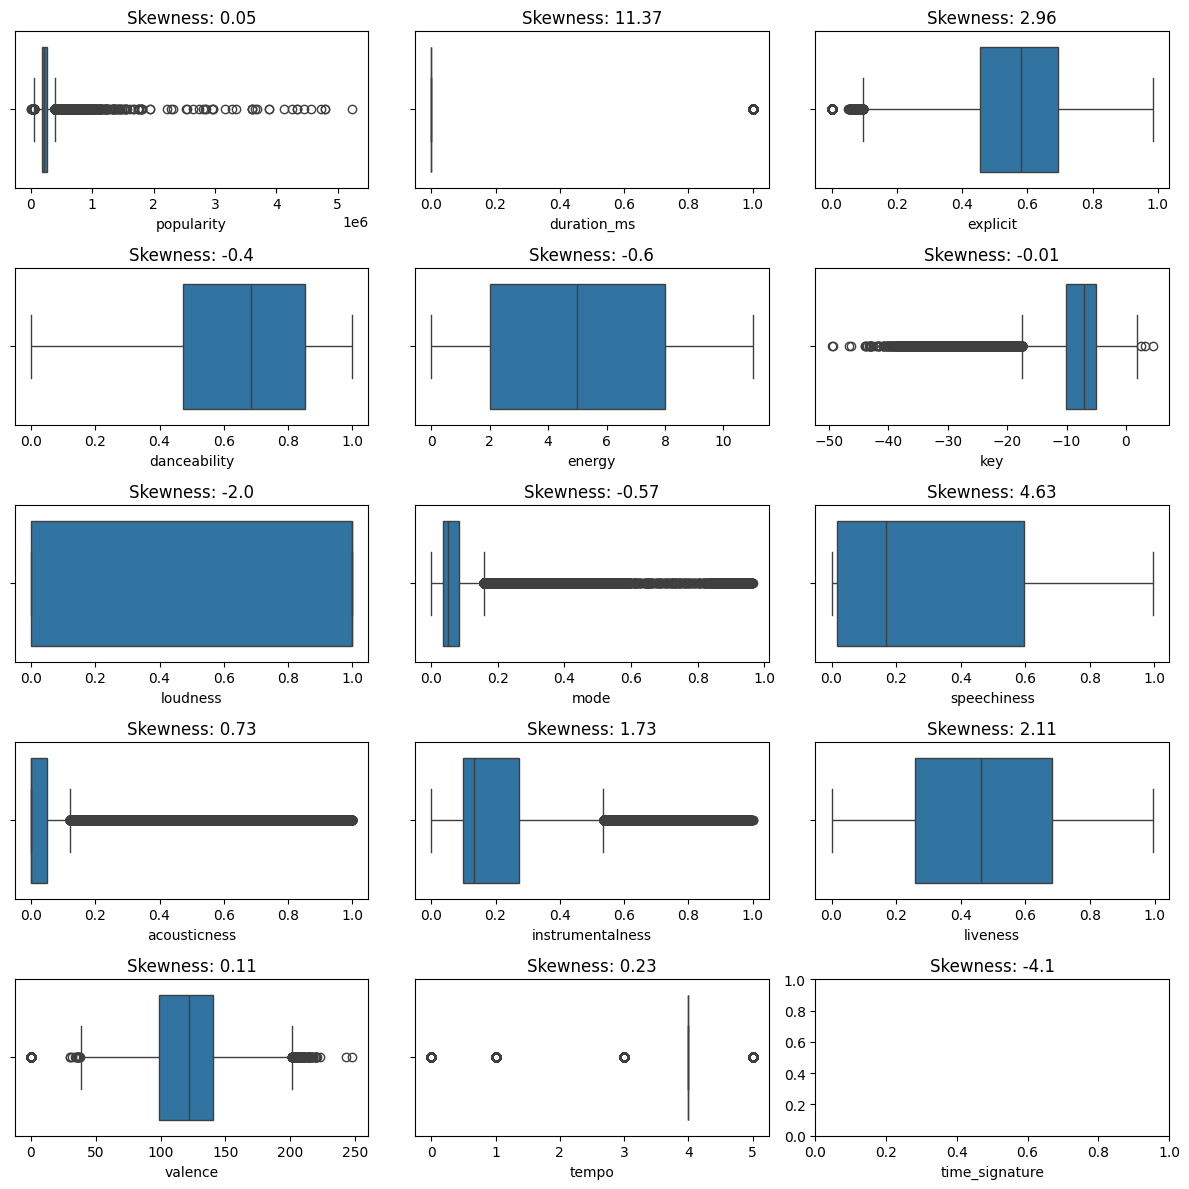

In [ ]:
t=1
plt.figure(figsize=(12,12))
for i in num_colms:
  sns.boxplot(data[i],orient='h')
  plt.subplot(5,3,t)
  plt.xlabel(i)
  plt.title(f'Skewness: {round(data[i].skew(),2)}')
  t+=1
plt.tight_layout()
plt.show()

### ***Inferences:***


> *  Duration, Acousticness, Loudness,  Speechiness exhibit high skewness and significant outliers.
* Low Skewness and Few Outliers: Popularity, Danceability, Energy, Valence, and Tempo have low skewness with fewer outliers.




## **Data Distribution Overview with Distplots**


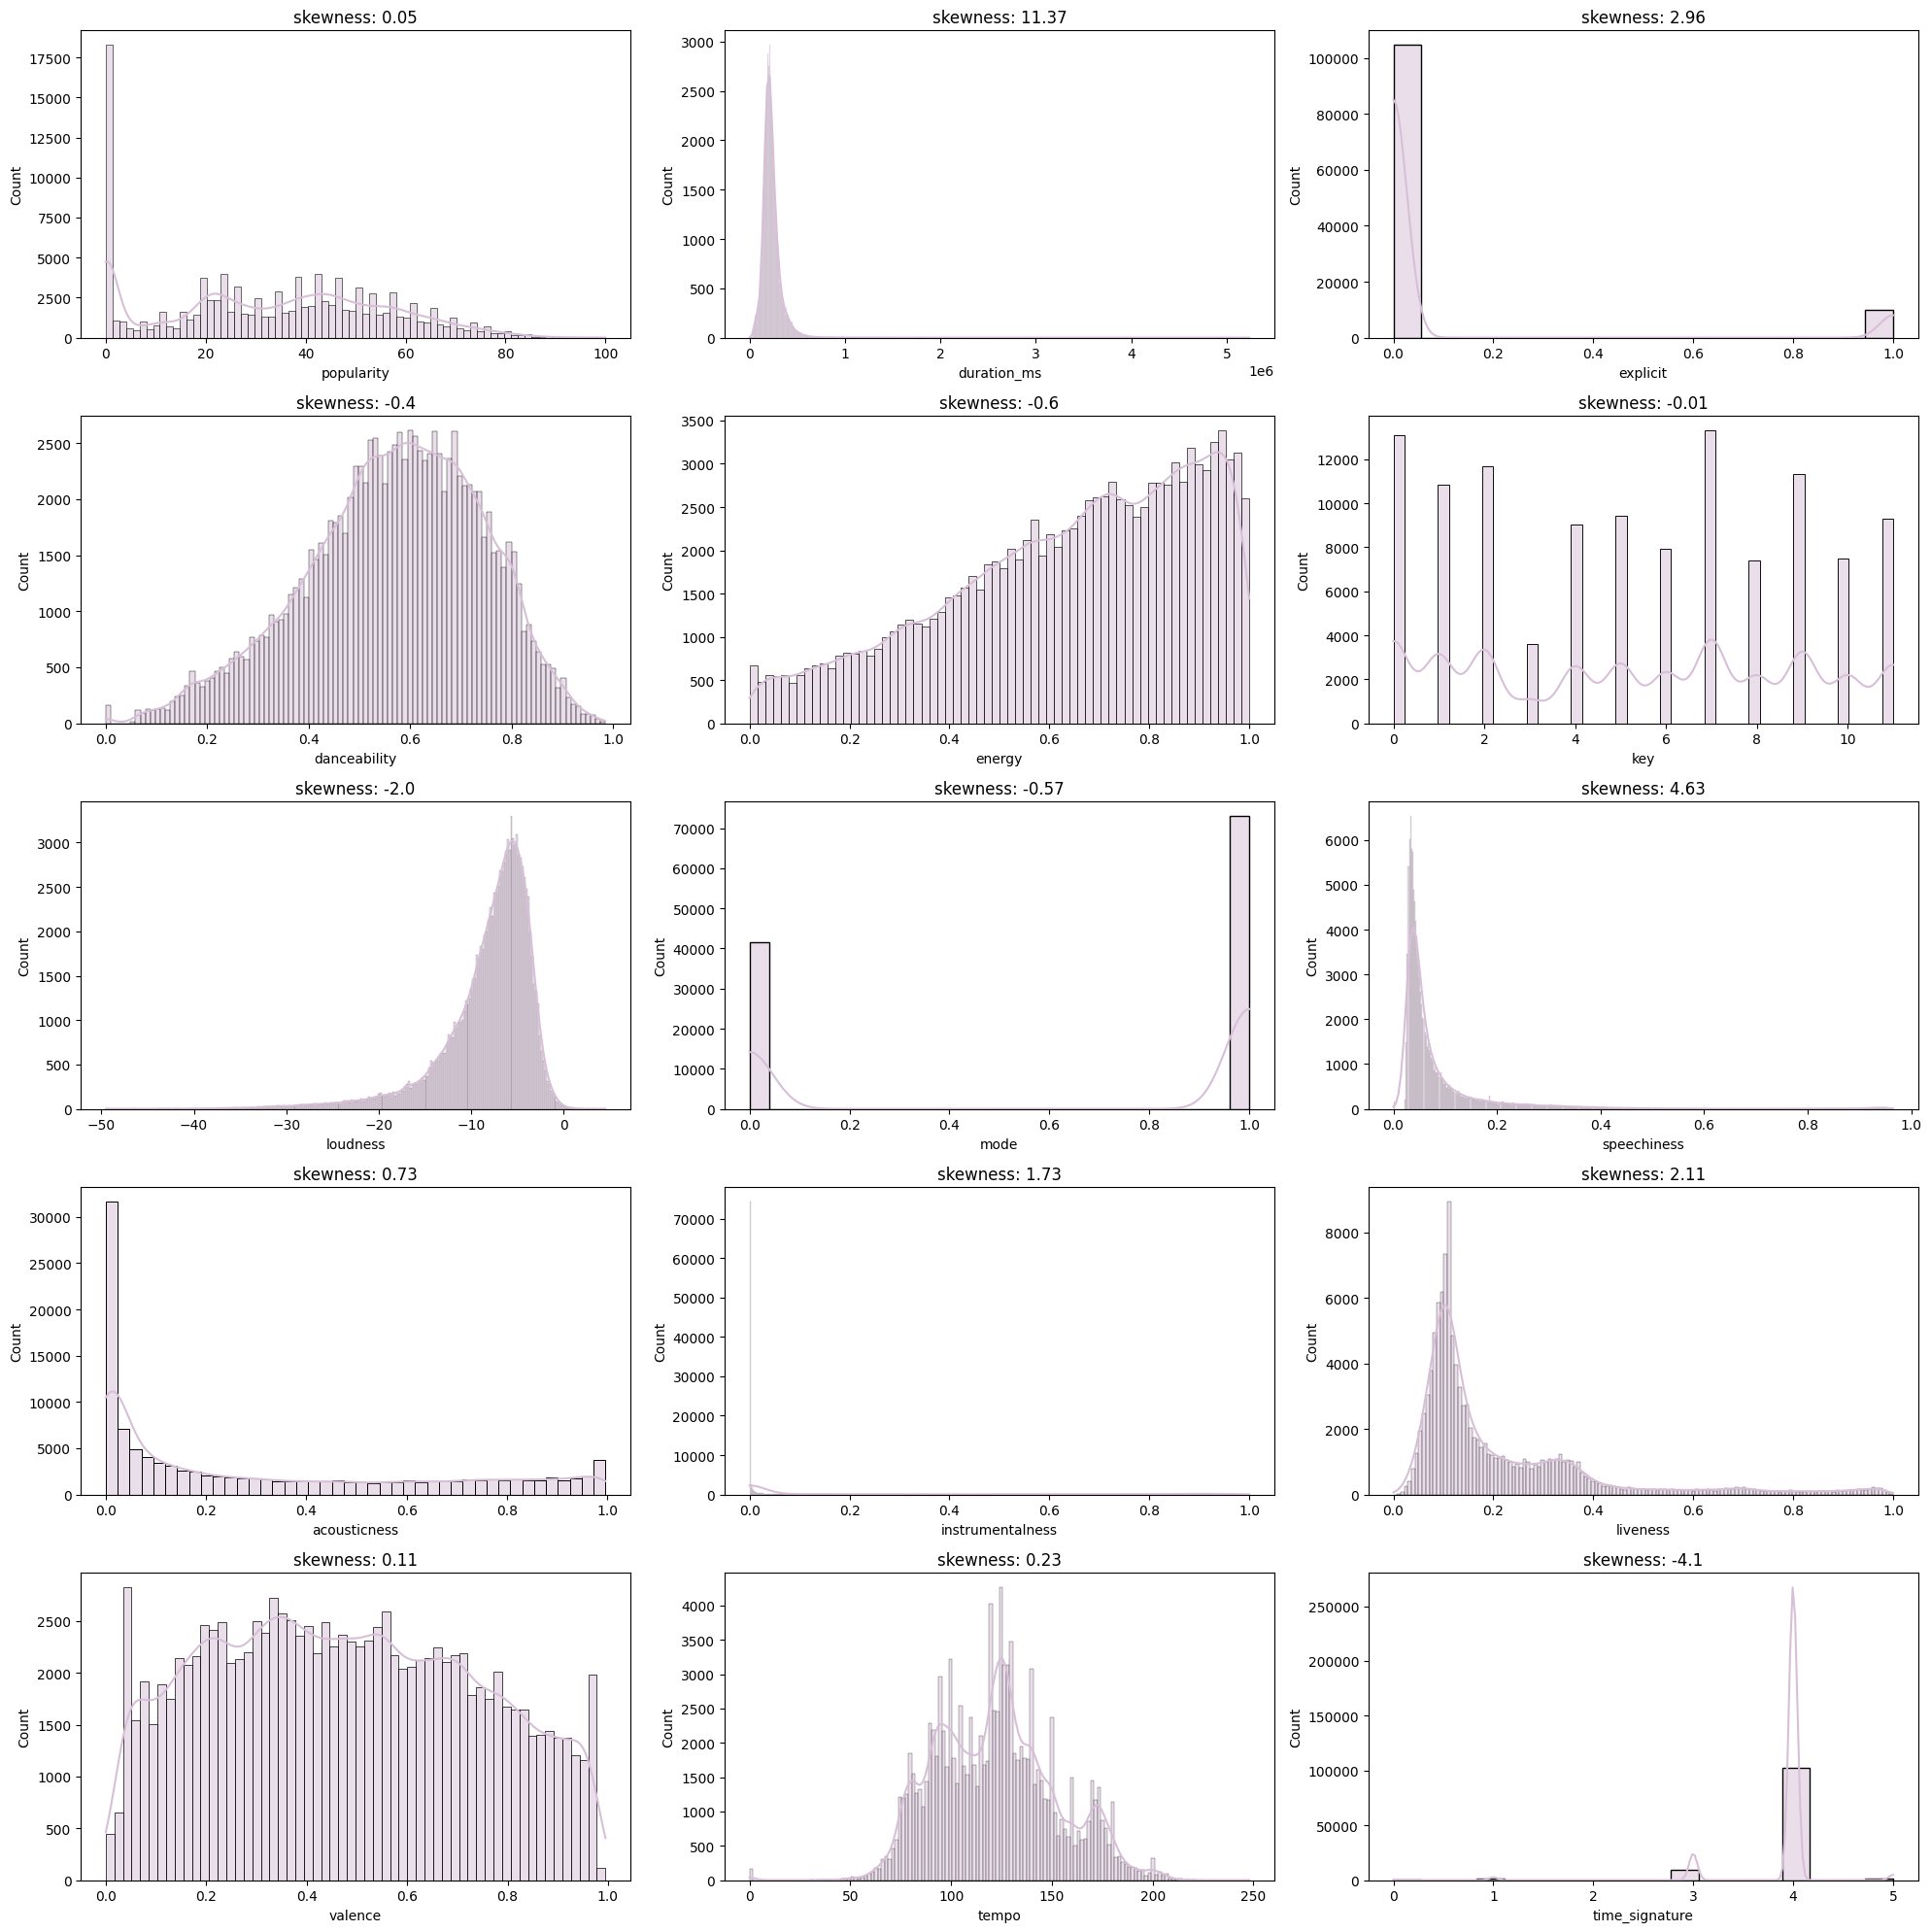

In [ ]:
t = 1
plt.figure(figsize=(20, 20))
for i in num_colms:
    plt.subplot(5, 3, t)
    sns.histplot(data[i], kde=True,color='thistle')
    plt.title(f'skewness: {round(data[i].skew(), 2)}')
    t += 1
plt.tight_layout()
plt.show()

### ***Inferences:***

> * Distribution Patterns: The plots show right-skewed distributions with longer tails toward higher values.
* Skewness Values: Skewness values (0.08, 11.51, 2.81) confirm the right-skewed nature of the data.
* Density Plots: Density plots highlight the right-skewed tendencies.
* Data Nature: Data is likely non-negative, anchored at zero.
* Outliers: Some plots suggest potential outliers in the right tail.
* Variability: Distributions differ in spread and shape, indicating diverse data characteristics.



## **Correlation Matrix Heatmap**

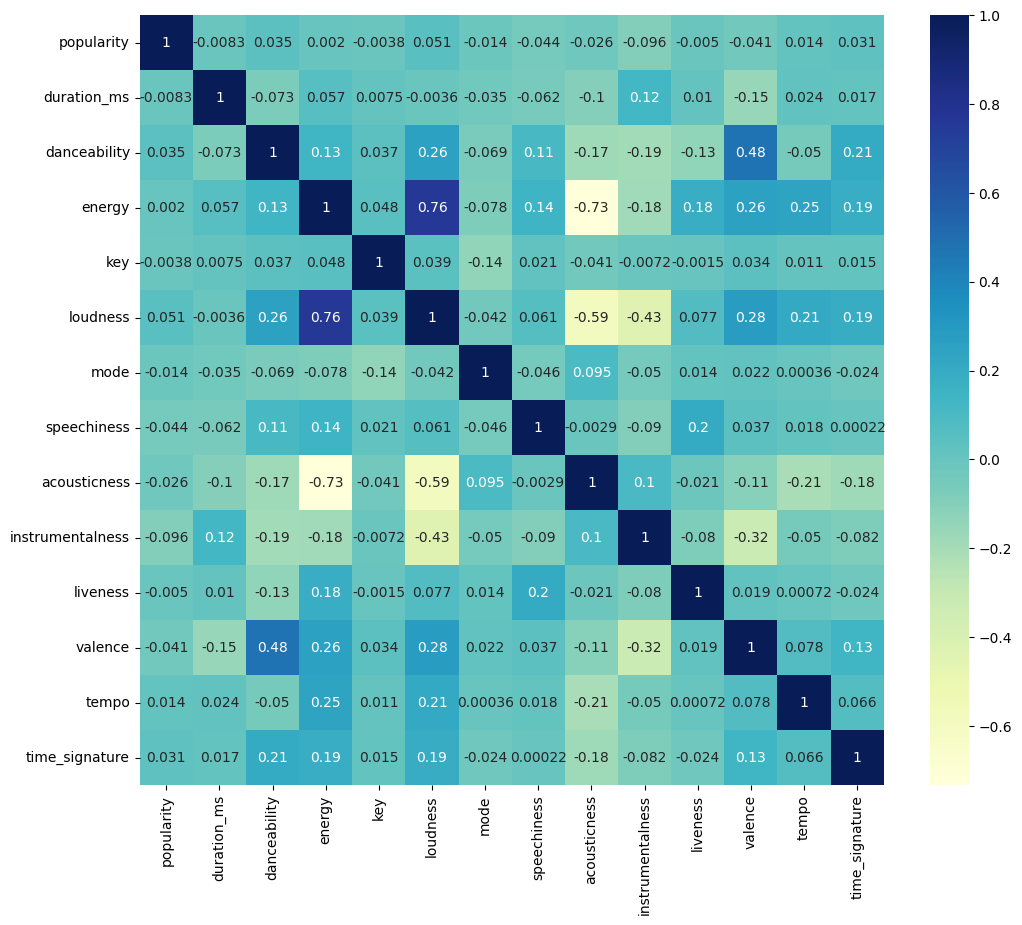

In [ ]:
num_colms = data.select_dtypes(include=['int64', 'float64'])
corr_data = num_colms.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_data, cmap="YlGnBu", annot=True)

plt.show()

### ***Inferences:***

Strong Positive Correlations:

> * Energy and Loudness (0.76): Songs with higher energy levels tend to be louder.
Valence and Danceability (0.48): Happier (higher valence) songs are more danceable.
* Loudness and energy show multicolinearity (0.77). Because "energy" is a subjective rating versus "loudness" which is measured, energy will be dropped from the data set.

Weak or No Significant Correlation:

> * Popularity(target column): Popularity has very weak correlations with other features, suggesting that popularity is not strongly dependent on any single feature in the dataset.
* Mode, Key, Time Signature: These features generally show weak correlations with other features.









### **Data Sampling Approach:** *Utilizing a representative sample to manage the large dataset.*

In [ ]:
import pandas as pd
# Sample a fraction of the data
data_sampled = data.sample(frac=0.01, random_state=42)  # Adjust the fraction as needed
rows,columns=data_sampled.shape
print('Total Number of Rows    :',rows)
print('Total Number of Columns :',columns)
# Get the top 10 genres by count
top_genres = data_sampled['genre'].value_counts().head(10).index
print('Top 10 genres by count  : ',top_genres.to_list())


Total Number of Rows    : 1145
Total Number of Columns : 20
Top 10 genres by count  :  ['cantopop', 'grunge', 'happy', 'comedy', 'trip-hop', 'funk', 'honky-tonk', 'dance', 'death-metal', 'alt-rock']


In [ ]:
data_sampled.head(2)

,track_id,artist,album,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
32394,5mqzhMuUpvnMfwNz6iepmO,Diplo;French Montana;Lil Pump;Zhavia,Welcome to the Party (with French Montana & Li...,Welcome to the Party (with French Montana & Li...,67,181720,True,0.618,0.845,2,0.175,1,0.1320,0.114,0.000000,0.415,0.486,171.921,4,electro
15294,0fFtXt5JE201F9fSd20P5G,The Wiggles,Lachy!,Castle of Dromore,28,149853,False,0.649,0.295,0,-10.695,1,0.0369,0.854,0.000009,0.130,0.546,131.766,3,children


## **Analyzing Categorical Data with Count Plots**

Visualizing ['explicit', 'key', 'mode', 'time_signature', 'genre'] highlights key categorical features affecting track characteristics. Excluding identifiers like track_id, artist, album, and track_name, which are difficult to visualize due to large data volumes, we'll check their percentage counts instead.

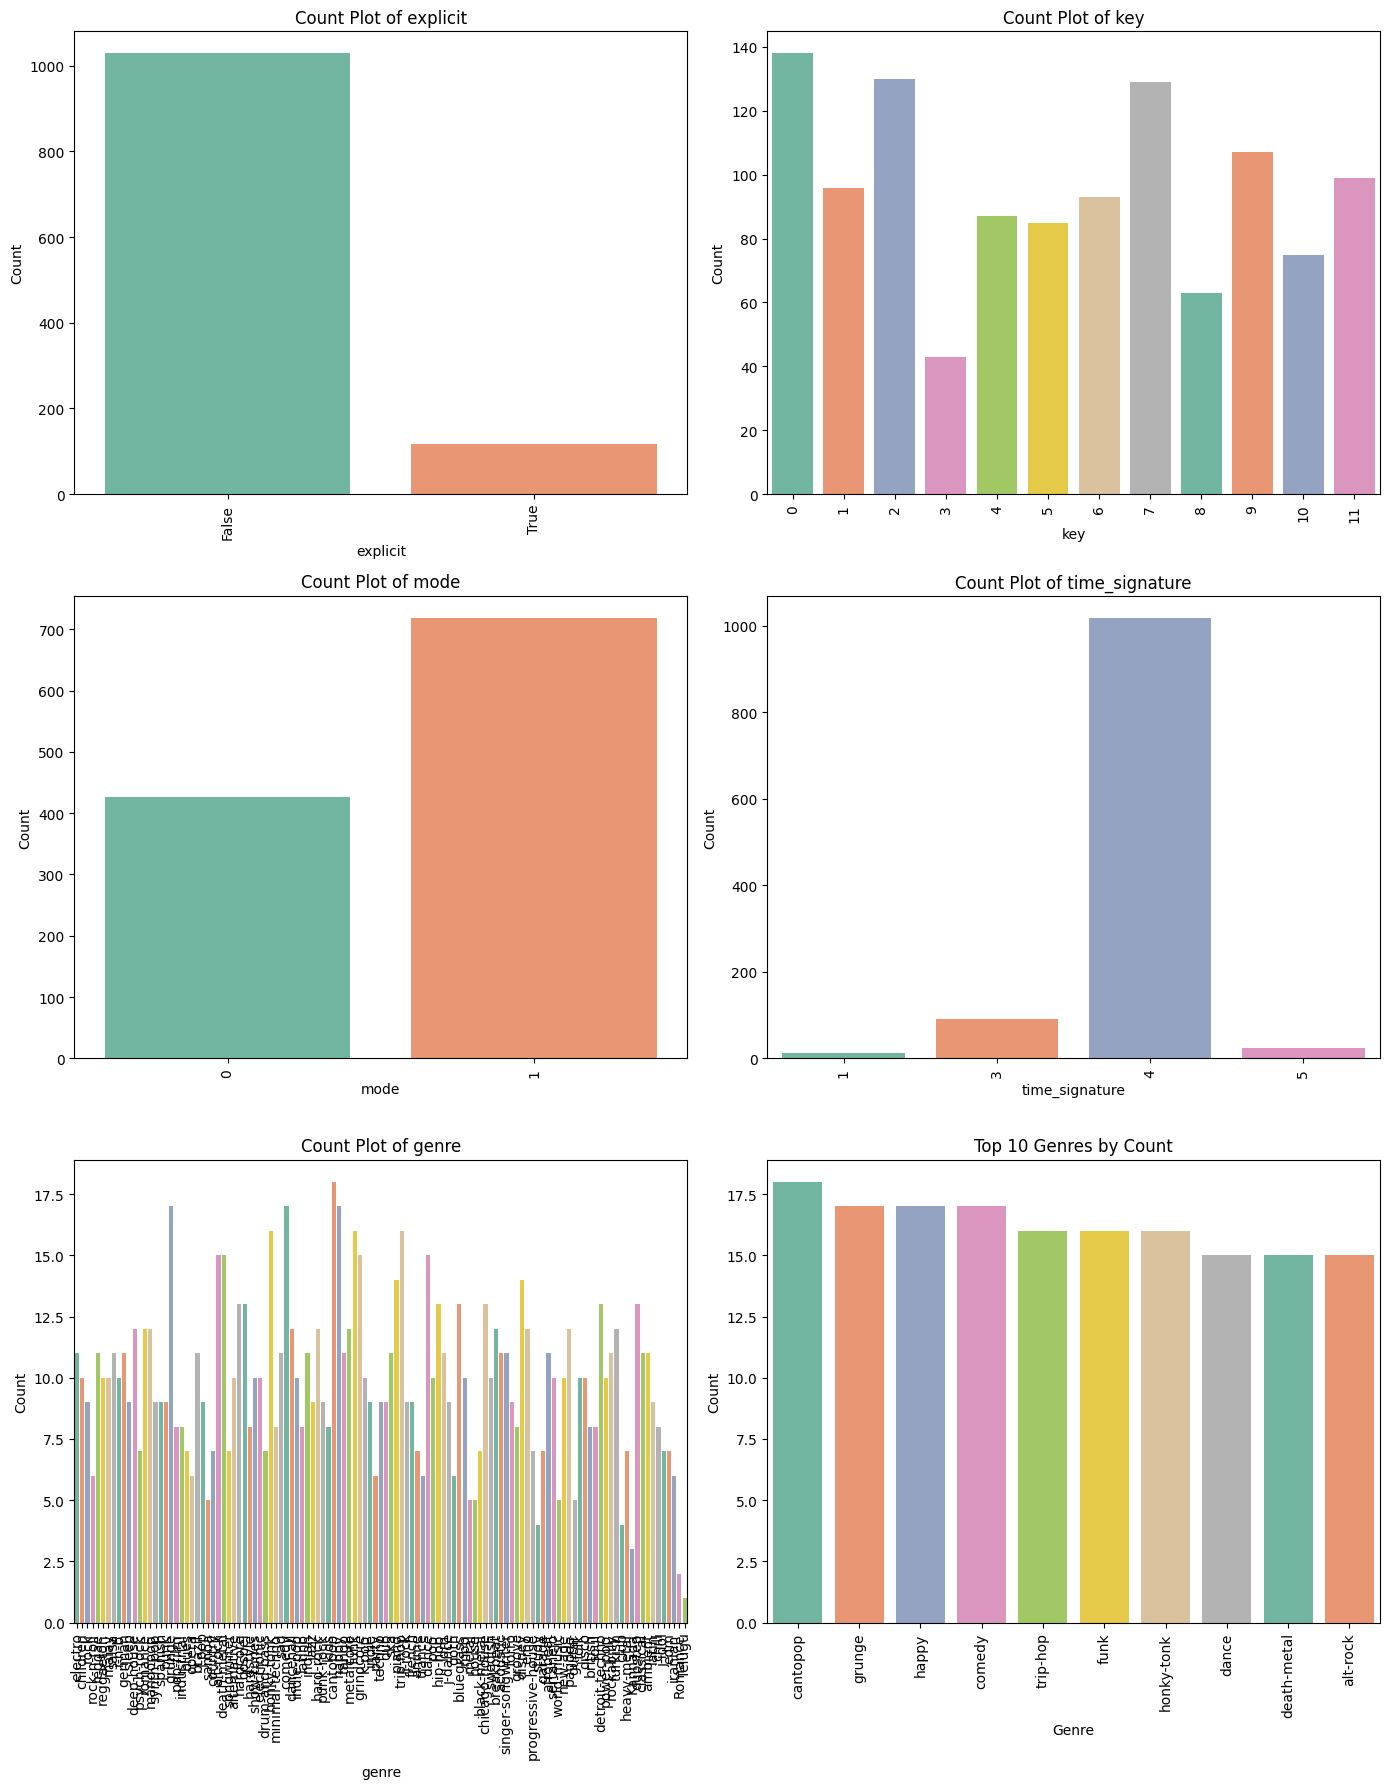

In [ ]:
palette = 'Set2'
columns = ['explicit', 'key', 'mode', 'time_signature', 'genre']
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

axes = axes.flatten()

# Create count plots for each categorical column
for i, column in enumerate(columns):
    sns.countplot(x=column, data=data_sampled, palette=palette, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

# Add the bar plot for the top 10 genres
sns.barplot(x=top_genres, y=data_sampled[data_sampled['genre'].isin(top_genres)]['genre'].value_counts(), palette=palette, ax=axes[-1])
axes[-1].set_title('Top 10 Genres by Count')
axes[-1].set_xlabel('Genre')
axes[-1].set_ylabel('Count')
axes[-1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### ***Inferences:***


> * Data Distribution: The provided plots visualize the distribution of categorical variables within a dataset, such as "explicit," "key," "mode," "time_signature," and "genre."
* Data Skewness: The distributions of "explicit," "mode," and "time_signature" are heavily skewed, indicating an imbalance in the data. For instance, there are significantly more non-explicit songs than explicit ones.
* Data Variability: The "key" and "genre" variables exhibit a wider range of values, suggesting greater diversity in those attributes compared to the other variables.
* Top 10 genres: 'Cantopop' has the highest count among the genres, closely followed by 'Grunge', 'Happy', and 'Comedy'. Each of these genres has a relatively similar count, indicating a diverse distribution of genres in the top 10.





In [ ]:
spotify_palette = sns.color_palette([
    '#1DB954',  # Spotify Green
    '#3DCE7E',  # Softer Green
    '#A9D4A8',  # Very Light Green
    '#2B2B2B',  # Dark Gray
    '#7D7D7D',  # Medium Gray
    '#B0B0B0',  # Light Gray
    '#E0E0E0',  # Very Light Gray
    '#000000',  # Black
    '#3C3C3C'   # Darker Gray (slightly lighter than black)
])

## **Most Popular Music Genres**

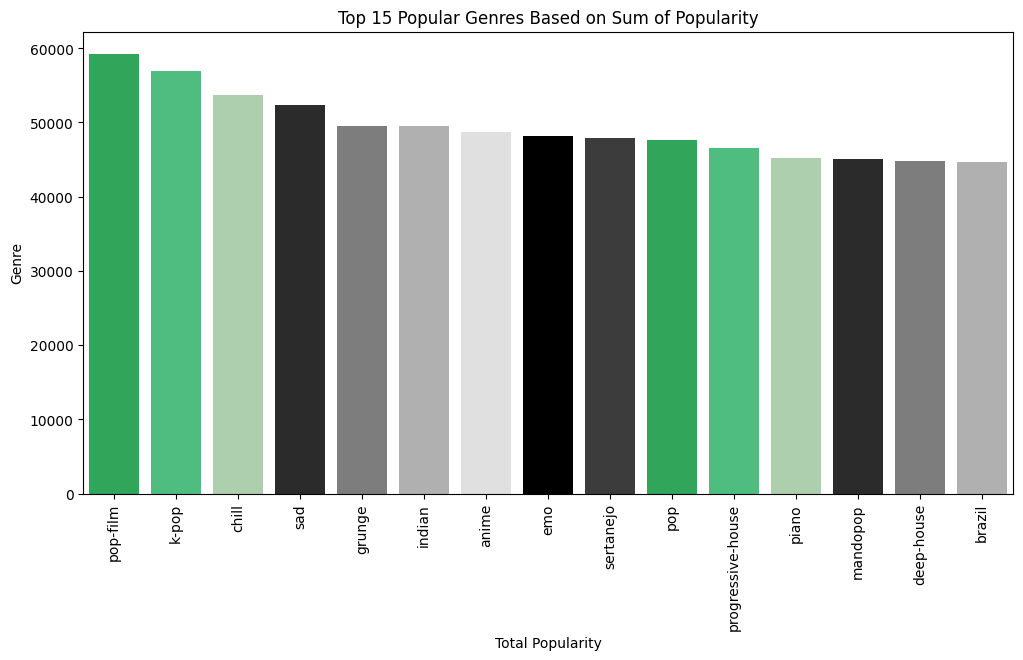

In [ ]:
# Group by genre and sum the popularity
genre_popularity = data.groupby('genre')['popularity'].sum().sort_values(ascending=False).head(15)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=genre_popularity.values, x=genre_popularity.index, palette=spotify_palette)
plt.xlabel('Total Popularity')
plt.ylabel('Genre')
plt.title('Top 15 Popular Genres Based on Sum of Popularity')
plt.xticks(rotation=90)
plt.show()


### **Inference:**


> * The Horizontal bar chart illustrating the popularity of the top 15 music genres based on the sum of their popularity scores.
* Pop-film emerges as the most popular genre, followed by k-pop and chill. The popularity scores range from approximately 10,000 to 60,000.



## **Artists by Number of Tracks**

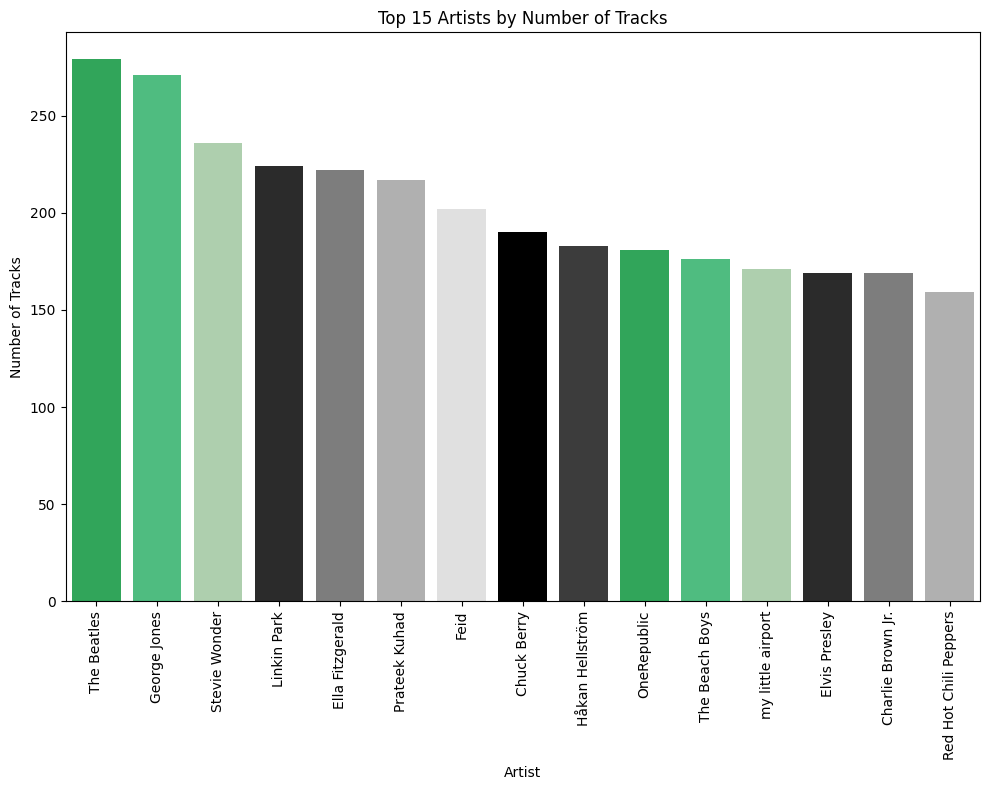

In [ ]:
# Group the data by 'artist' and count the number of tracks for each artist
artist_track_counts = data.groupby('artist')['track_name'].count().sort_values(ascending=False).head(15)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=artist_track_counts.index, y=artist_track_counts.values, palette=spotify_palette)
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Top 15 Artists by Number of Tracks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### **Inference:**


> * The bar chart ranking the top 15 artists based on their total number of tracks.
* The Beatles have the highest number of tracks, followed by George Jones and Stevie Wonder.
* The number of tracks ranges from approximately 50 to 275.`



## **Most Popular Artists**

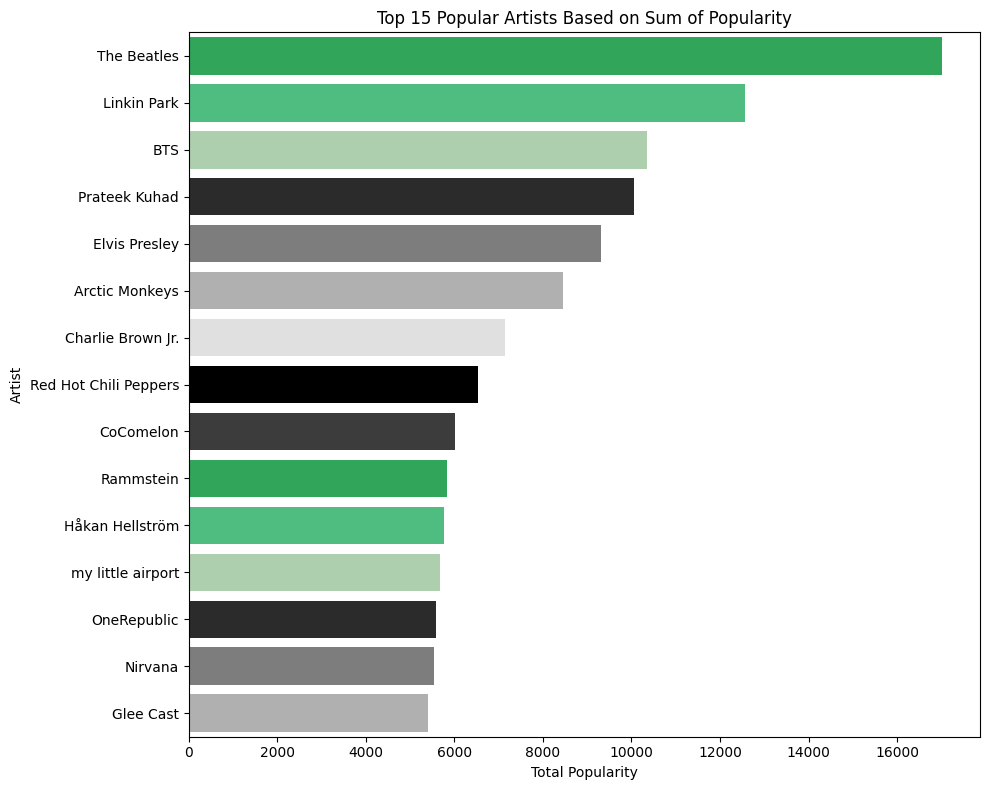

In [ ]:
# Group the data by 'artist' and sum the popularity for each artist
artist_popularity = data.groupby('artist')['popularity'].sum().sort_values(ascending=False).head(15)


# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=artist_popularity.values, y=artist_popularity.index, palette=spotify_palette)
plt.xlabel('Total Popularity')
plt.ylabel('Artist')
plt.title('Top 15 Popular Artists Based on Sum of Popularity')
plt.tight_layout()
plt.show()


### **Inference:**

> * The horizontal bar chart ranking the top 15 artists based on their total popularity score.
* The Beatles hold the top position, followed by Linkin Park and BTS.
* The popularity scores for the top 15 artists range from approximately 5000 to 16,000.



## **Most Popular Songs on Spotify**

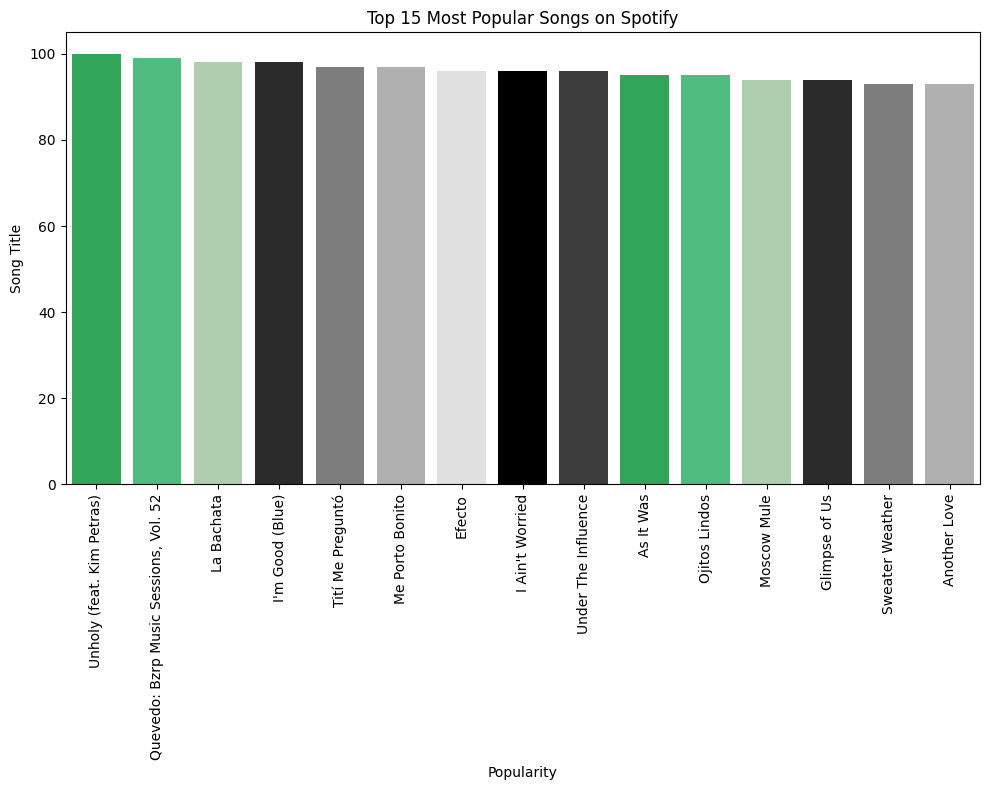

In [ ]:
# Group the data by 'track_name' and get the maximum popularity for each song
song_popularity = data.groupby('track_name')['popularity'].max().sort_values(ascending=False).head(15)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(y=song_popularity.values, x=song_popularity.index, palette=spotify_palette)
plt.xlabel('Popularity')
plt.ylabel('Song Title')
plt.title('Top 15 Most Popular Songs on Spotify')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# **Inference:**

> * The bar chart ranking the top 15 most popular songs on Spotify based on an unspecified popularity metric.
* "Unholy (feat. Kim Petras)" is the most popular song, followed closely by "Quevedo: Bzrp Music Sessions, Vol. 52" and "La Bachata."
* The popularity scores range from approximately 0 to 100.


In [ ]:
# List of excluded columns
excluded_columns = ['track_id', 'artist', 'album', 'track_name']

# Calculate and print the percentage of categories for each excluded column
for col in excluded_columns:
    # Calculate percentage of each category
    percentage = data[col].value_counts(normalize=True) * 100

    # Print the results
    print(f'Percentage of categories in {col}:\n{percentage}\n')


Percentage of categories in track_id:
track_id
6S3JlDAGk3uu3NtZbPnuhS    0.007862
2Ey6v4Sekh3Z0RUSISRosD    0.006989
2kkvB3RNRzwjFdGhaUA0tz    0.006989
5ftfVzSLIi5ZxYdNbRtf41    0.006115
0e5LcankE0UyJUuCoq1uH2    0.006115
                            ...   
3SdcbuF7hnO8qMv87j77Eo    0.000874
5FW6UXUWfNlrwXV0dyF24X    0.000874
2e6btU9hQKneTbOYmjajE6    0.000874
6j485oHQmvCs2yAskQlf5c    0.000874
2hETkH7cOfqmz3LqZDHZf5    0.000874
Name: proportion, Length: 90205, dtype: float64

Percentage of categories in artist:
artist
The Beatles        0.243732
George Jones       0.236743
Stevie Wonder      0.206168
Linkin Park        0.195684
Ella Fitzgerald    0.193937
                     ...   
Specimen           0.000874
Harsh Symmetry     0.000874
BF/C               0.000874
Hapax              0.000874
Jesus Culture      0.000874
Name: proportion, Length: 31678, dtype: float64

Percentage of categories in album:
album
Alternative Christmas 2022     0.170350
Feliz Cumpleaños con Perreo    0.16074

explicit pie chart

### ***Inference:***

> * Track ID: Diverse with each ID contributing minimally (0.001-0.008%).
* Artist: Dominated by a few popular artists, with many contributing very little.
* Album: A few albums are prominent, while many have minimal representation.
* Track Name: Popular tracks dominate, with many contributing minimally.
* Explicit: Predominantly non-explicit (90.74% non-explicit vs. 9.26% explicit).
* Genre: Broad range of genres, with a fairly even distribution across most, but some genres are underrepresented.



Since we have a very large data hence we are using a sample of data which
represents the population for Bivariate and Multivariate Analysis.

# Exploring Relationships in Data

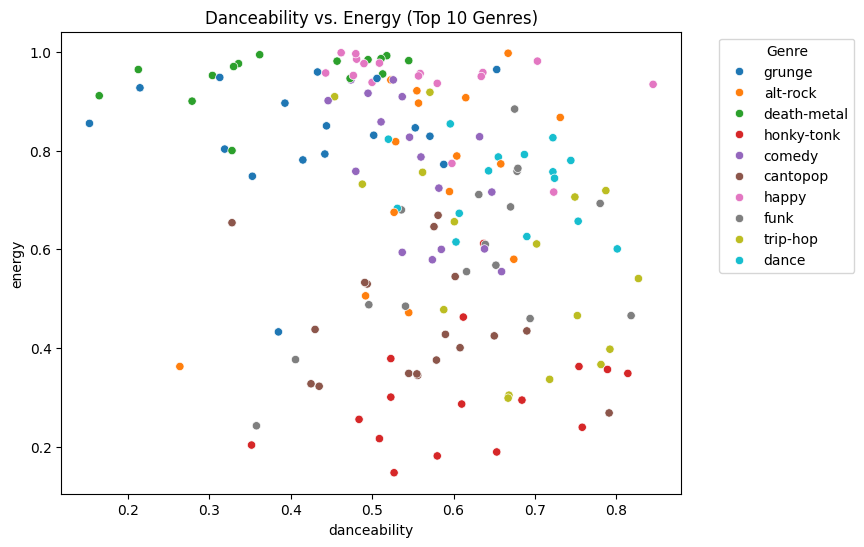

In [ ]:
# Filter the dataset to include only top 10 genres
filtered_data = data_sampled[data_sampled['genre'].isin(top_genres)]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_data, x='danceability', y='energy', hue='genre')

plt.title('Danceability vs. Energy (Top 10 Genres)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### ***Inference:***


> * Danceability and energy levels vary by genre, with genres like dance and happy scoring higher.
* Some genres exhibit higher danceability and energy scores compared to others.
* Overlaps in danceability and energy levels across genres indicate shared characteristics.

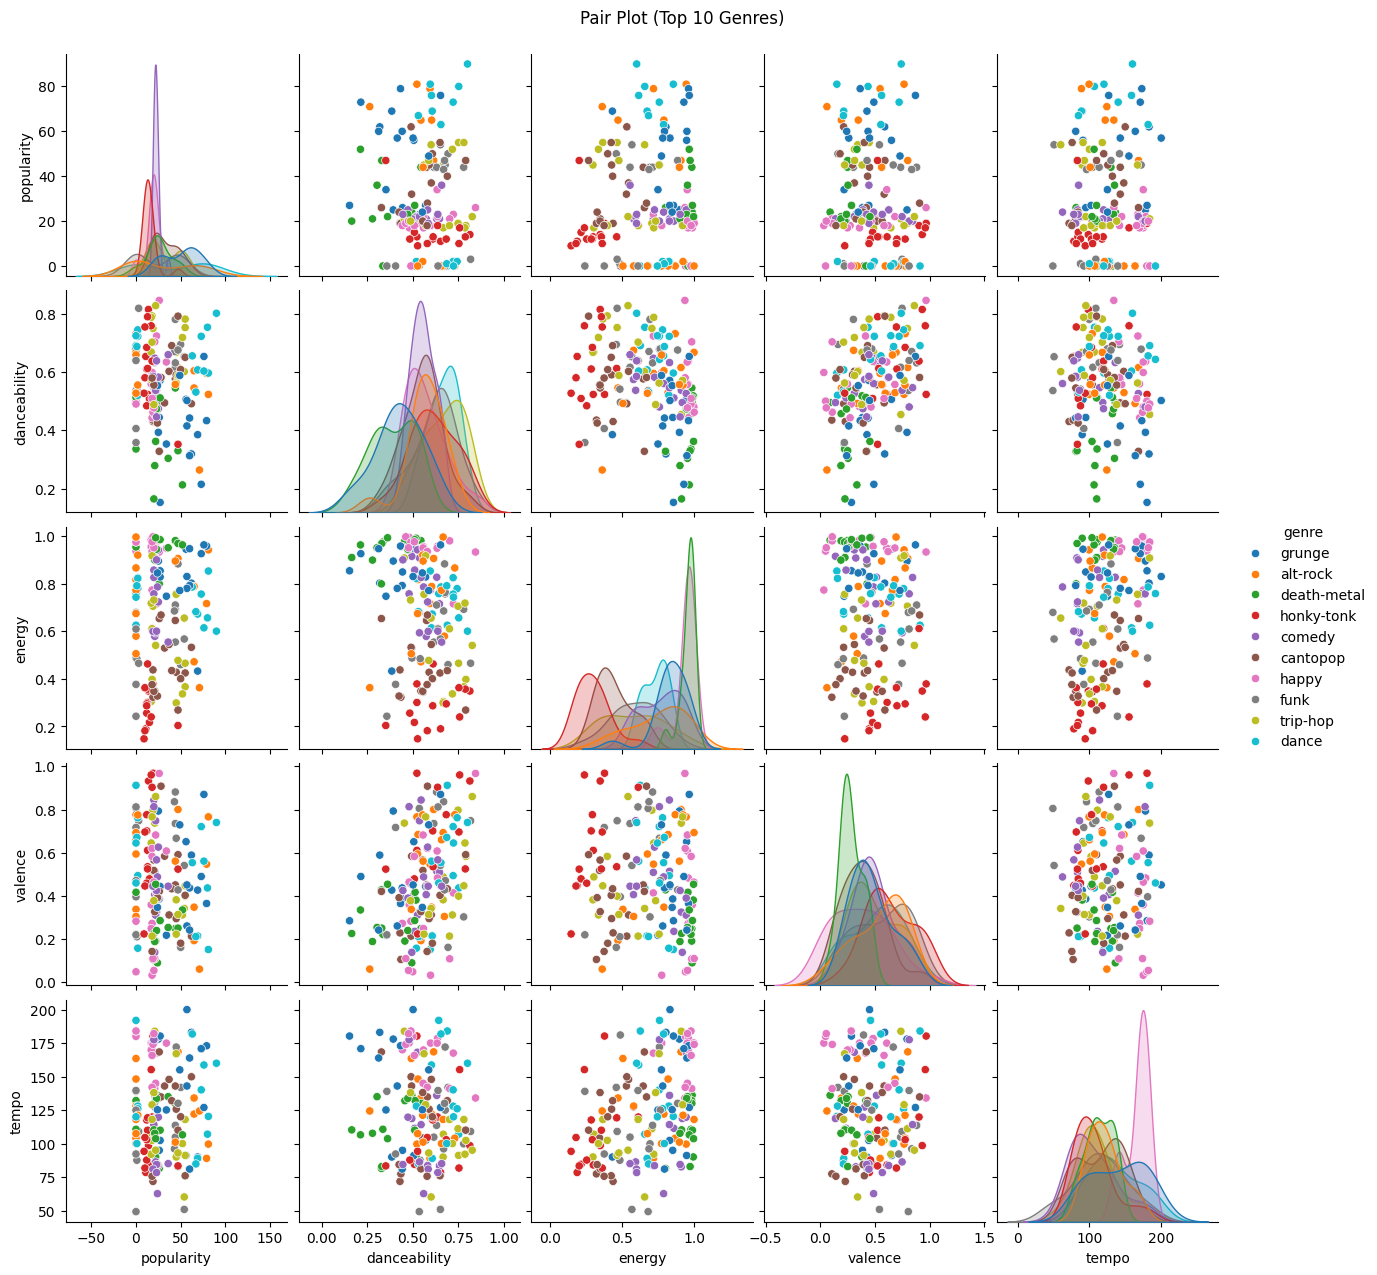

In [ ]:
# Filter the dataset to include only the top 10 genres
filtered_data = data_sampled[data_sampled['genre'].isin(top_genres)]

sns.pairplot(filtered_data, vars=['popularity', 'danceability', 'energy', 'valence', 'tempo'], hue='genre', diag_kind='kde')

plt.suptitle('Pair Plot (Top 10 Genres)', y=1.02)
plt.show()

### ***Inference:***

**Popularity:**
> * Popularity scores exhibit a wide range across all genres.
* The distribution of popularity scores is slightly right-skewed, indicating fewer songs with very high popularity.

**Danceability:**
> * Most songs have a danceability score between 0.5 and 0.9.
* There is no strong visual correlation between danceability and other features.

**Energy:**
> * Energy scores are fairly spread out but tend to cluster around the middle values.
* No strong correlation is observed between energy and other features.

**Valence:**


> * Valence scores span the full range from 0 to 1.
* The distribution of valence scores appears to be relatively uniform.

**Tempo:**


> * Tempo values have a wide range, with most songs clustered between 50 and 200 BPM.
* Certain genres may have characteristic tempo ranges, although this is not immediately clear from the plot.

**Inter-feature Relationships:**


> * Scatter plots reveal slight positive correlations between some features, such as energy and danceability.
* Most feature pairs do not show strong correlations, suggesting that each feature provides unique information about the songs.

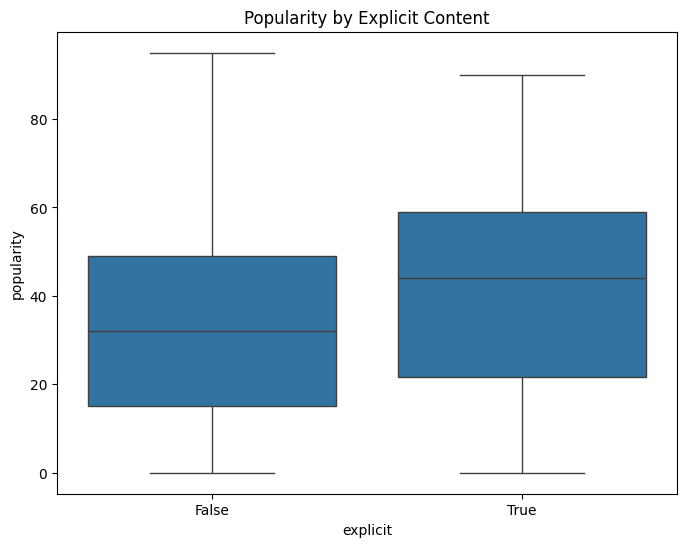

In [ ]:
# Box Plot: Popularity across explicit and non-explicit tracks
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_sampled, x='explicit', y='popularity')
plt.title('Popularity by Explicit Content')
plt.show()

### ***Inference:***

> * Explicit content songs tend to have higher popularity compared to non-explicit songs.
* There is a wider range of popularity among explicit content songs.

### **Danceability Distribution Across Genres and Explicit Content**
Overall, the visualization highlights the diverse nature of danceability across music genres and provides a foundation for further analysis to understand the relationship between danceability, genre, and explicit content.

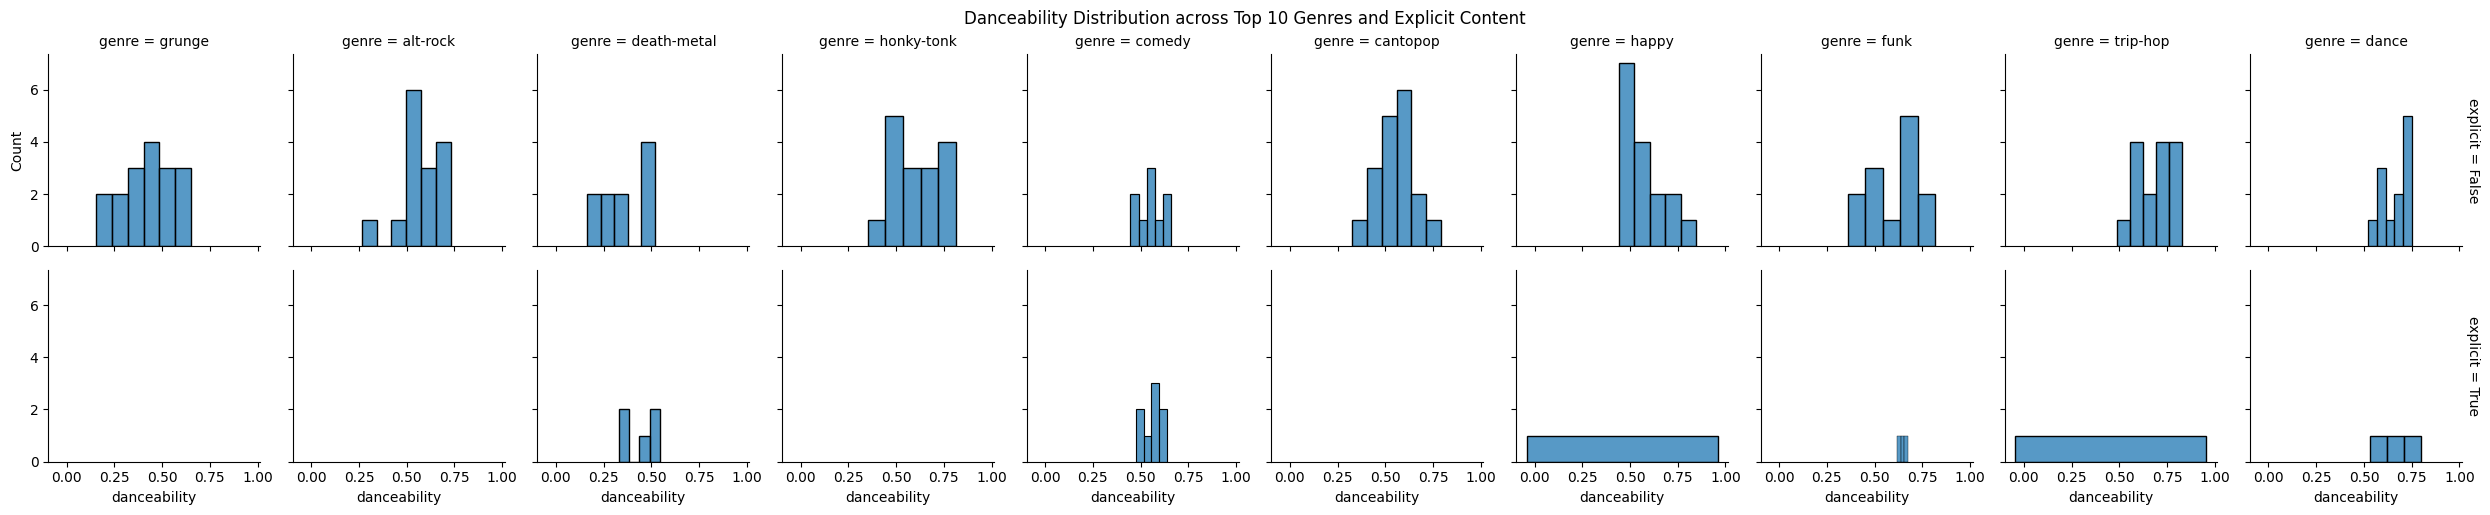

In [ ]:
# Filter the dataset to include only the top 10 genres
filtered_data = data_sampled[data_sampled['genre'].isin(top_genres)]

g = sns.FacetGrid(filtered_data, col='genre', row='explicit', margin_titles=True, height=2.5)
g.map(sns.histplot, 'danceability')

plt.suptitle('Danceability Distribution across Top 10 Genres and Explicit Content', y=1.02)
plt.show()

### **Relationship Between Popularity and Categorical Variables**

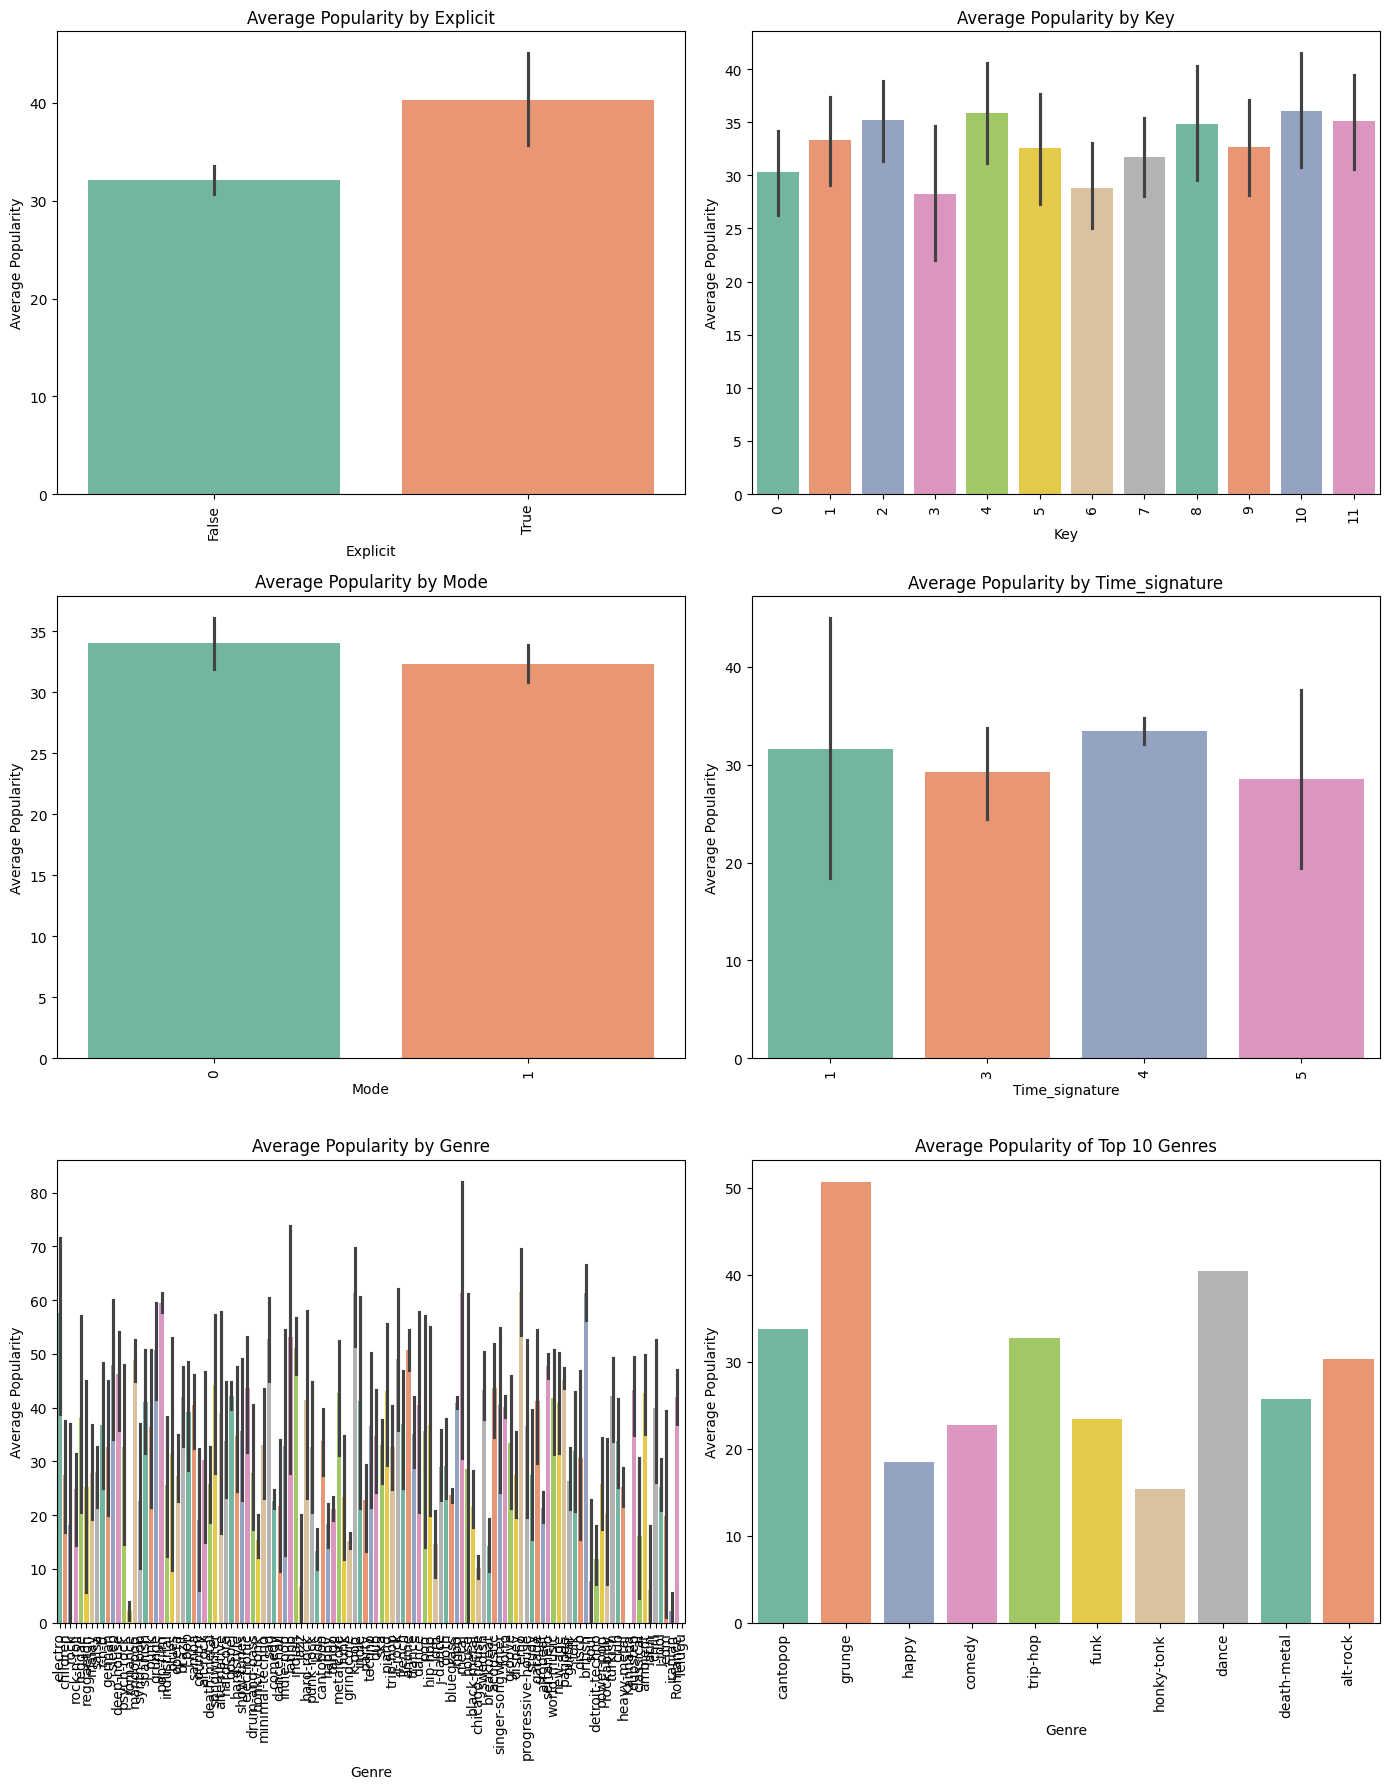

In [ ]:
palette = 'Set2'
columns = ['explicit', 'key', 'mode', 'time_signature', 'genre']
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.flatten()

# Create bar plots for each categorical column
for i, column in enumerate(columns):
        sns.barplot(x=column, y='popularity', data=data_sampled, palette=palette, ax=axes[i], estimator=np.mean)
        axes[i].set_title(f'Average Popularity by {column.capitalize()}')
        axes[i].set_xlabel(column.capitalize())
        axes[i].set_ylabel('Average Popularity')
        axes[i].tick_params(axis='x', rotation=90)

# Add the bar plot for the top 10 genres
sns.barplot(x=top_genres, y=[data_sampled[data_sampled['genre'] == genre]['popularity'].mean() for genre in top_genres], palette=palette, ax=axes[-1])
axes[-1].set_title('Average Popularity of Top 10 Genres')
axes[-1].set_xlabel('Genre')
axes[-1].set_ylabel('Average Popularity')
axes[-1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


### ***Inference:***
**Explicit Songs and Popularity**
> Explicit songs tend to have a higher mean popularity score compared to non-explicit songs. This is an intriguing trend considering the data contains a significantly higher number of non-explicit songs. Despite their lower prevalence, explicit songs seem to resonate more with listeners, leading to higher average popularity.



**Key and Popularity**


> When examining the popularity scores across different musical keys, the key 'E' stands out with the highest mean popularity score. Although the differences between keys are relatively small, 'E' maintains a slight edge. This suggests that while key might not be a major factor, certain keys like 'E' might have a marginal advantage in terms of listener preference.

**Mode and Popularity**


> Songs in a minor key appear to have a slight edge in popularity over those in a major key. Similar to the trend observed with explicit songs, this is noteworthy because there are far more songs in a major key within the dataset. Despite the dominance of major key songs, those in a minor key tend to have a higher average popularity, hinting at a possible preference for the emotional tone conveyed by minor keys.

**Time Signature and Popularity**


> The time signature of 4/4 emerges as the most popular among listeners, with the highest mean popularity score. It is also the most prevalent time signature in the dataset by a significant margin. This indicates that the 4/4 time signature, being a common and widely used rhythm, aligns well with listener preferences and contributes to higher song popularity.

**Genres and Popularity**


> There are a vast number of genres in the dataset, making it challenging to identify a clear winner in terms of popularity. The diversity of genres reflects a wide range of musical tastes among listeners. However, due to the sheer number of genres, it is difficult to discern distinct trends or draw concrete conclusions about which specific genres lead in popularity from the visual plot alone.



# **Data Cleaning**

**Handling Missing Values:** Since there is only one row with null values, it will be deleted to ensure dataset completeness.

In [ ]:
data[data.isnull().any(axis=1)]

,track_id,artist,album,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
66371,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [ ]:
data.dropna(inplace=True,axis=0)

**Handling Duplicate Rows:** The dataset initially contained 450 duplicate rows. These duplicates have been removed, retaining only the first occurrence of each duplicate row to ensure data uniqueness.

In [ ]:
data.duplicated().sum()

450

In [ ]:
#Keep the first occurrence of duplicates
data = data.drop_duplicates(keep='first')

**Dropping Irrelevant Columns:** The columns track_id, track_name, and album are dropped as they are identifiers and do not contribute to the analysis of song popularity. Removing them simplifies the dataset and focuses on relevant features for the prediction model.

In [ ]:
data.drop(columns=['track_id', 'track_name', 'album'],inplace=True)

In [ ]:
data.head(2)

,artist,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,Sid Sriram,50,198250,False,0.563,0.432,1,-7.862,1,0.0278,0.818,0.000008,0.119,0.348,76.499,4,Tamil
1,Ilaiyaraaja,53,275504,False,0.331,0.235,4,-13.816,0,0.0411,0.891,0.000003,0.107,0.252,82.511,4,Tamil


# **Transforming Categorical Data**

**Encoding Decisions:** Evaluate the value counts for different columns to decide the appropriate encoding method for categorical variables.

In [ ]:
data.select_dtypes(include=['object',bool]).nunique()

,0
artist,31678
explicit,2
genre,121


**Artist**
> * Encoding Method: Frequency Encoding
* Reason: Given a high number of unique values, frequency encoding assigns values based on occurrence frequency, reducing dimensionality compared to one-hot encoding.


In [ ]:
frequency_encoding = data['artist'].value_counts(normalize=True).to_dict()
data['artist'] = data['artist'].map(frequency_encoding)
data

,artist,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.000035,50,198250,False,0.563,0.4320,1,-7.862,1,0.0278,0.8180,0.000008,0.1190,0.3480,76.499,4,Tamil
1,0.000088,53,275504,False,0.331,0.2350,4,-13.816,0,0.0411,0.8910,0.000003,0.1070,0.2520,82.511,4,Tamil
2,0.000009,14,138680,False,0.226,0.0803,2,-21.048,0,0.0484,0.9200,0.891000,0.0969,0.1370,176.020,3,Tamil
3,0.000079,35,223499,False,0.721,0.6570,11,-8.304,1,0.0319,0.0322,0.001090,0.0618,0.4540,132.970,4,Tamil
4,0.000018,36,47641,False,0.598,0.6470,11,-10.136,0,0.1750,0.6860,0.000308,0.3770,0.8200,175.054,4,Tamil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114466,0.000035,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
114467,0.000035,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
114468,0.000123,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
114469,0.000263,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music



**Explicit**
> * Encoding Method: Label Encoding
* Reason: This binary feature (True/False) can be represented simply with 0 and 1, which is a straightforward form of label encoding.



In [ ]:
label_encoder = LabelEncoder()
data['explicit'] = label_encoder.fit_transform(data['explicit'])
data.head()

,artist,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.000035,50,198250,0,0.563,0.4320,1,-7.862,1,0.0278,0.8180,0.000008,0.1190,0.348,76.499,4,Tamil
1,0.000088,53,275504,0,0.331,0.2350,4,-13.816,0,0.0411,0.8910,0.000003,0.1070,0.252,82.511,4,Tamil
2,0.000009,14,138680,0,0.226,0.0803,2,-21.048,0,0.0484,0.9200,0.891000,0.0969,0.137,176.020,3,Tamil
3,0.000079,35,223499,0,0.721,0.6570,11,-8.304,1,0.0319,0.0322,0.001090,0.0618,0.454,132.970,4,Tamil
4,0.000018,36,47641,0,0.598,0.6470,11,-10.136,0,0.1750,0.6860,0.000308,0.3770,0.820,175.054,4,Tamil


**Genre**



> * Encoding Method: Label Encoding
* Reason: With many unique values, label encoding is efficient and avoids increasing dimensionality.


In [ ]:
label_encoder = LabelEncoder()
data['genre'] = label_encoder.fit_transform(data['genre'])
data.head()

,artist,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.000035,50,198250,0,0.563,0.4320,1,-7.862,1,0.0278,0.8180,0.000008,0.1190,0.348,76.499,4,5
1,0.000088,53,275504,0,0.331,0.2350,4,-13.816,0,0.0411,0.8910,0.000003,0.1070,0.252,82.511,4,5
2,0.000009,14,138680,0,0.226,0.0803,2,-21.048,0,0.0484,0.9200,0.891000,0.0969,0.137,176.020,3,5
3,0.000079,35,223499,0,0.721,0.6570,11,-8.304,1,0.0319,0.0322,0.001090,0.0618,0.454,132.970,4,5
4,0.000018,36,47641,0,0.598,0.6470,11,-10.136,0,0.1750,0.6860,0.000308,0.3770,0.820,175.054,4,5


### **Normality Assessment: Shapiro-Wilk Test**
The Shapiro-Wilk test evaluates if the data meets normality assumptions for statistical methods, helping in choosing suitable analysis techniques. If the data is not normally distributed, it suggests possible transformations or alternative methods.


**Hypothesis:**
> * Null Hypothesis (H0): The data is normally distributed.
* Alternative Hypothesis (H1): The data is not normally distributed.

Unlike visual assessments from EDA, this statistical test offers a rigorous confirmation of normality.

In [ ]:
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
             'speechiness', 'acousticness', 'instrumentalness', 'liveness',
             'valence', 'tempo']

results = {}

for feature in features:
    stat, p_value = shapiro(data[feature])
    results[feature] = {'Statistic': stat, 'p-value': p_value}

for feature, result in results.items():
    print(f"Feature: {feature}")
    print(f"Shapiro-Wilk Statistic: {result['Statistic']:.4f}, p-value: {result['p-value']}")
    if result['p-value'] < 0.05:
        print(f"    Result at 95% confidence: The data is not normally distributed (reject H0).")
    else:
        print(f"    Result at 95% confidence: The data is normally distributed (fail to reject H0).")
    print()


Feature: popularity
Shapiro-Wilk Statistic: 0.9578, p-value: 2.1302331843195725e-92
    Result at 95% confidence: The data is not normally distributed (reject H0).

Feature: duration_ms
Shapiro-Wilk Statistic: 0.6588, p-value: 7.286784120934749e-152
    Result at 95% confidence: The data is not normally distributed (reject H0).

Feature: danceability
Shapiro-Wilk Statistic: 0.9870, p-value: 1.6197161889875091e-65
    Result at 95% confidence: The data is not normally distributed (reject H0).

Feature: energy
Shapiro-Wilk Statistic: 0.9461, p-value: 1.2746324436018698e-98
    Result at 95% confidence: The data is not normally distributed (reject H0).

Feature: loudness
Shapiro-Wilk Statistic: 0.8383, p-value: 6.450935807149252e-129
    Result at 95% confidence: The data is not normally distributed (reject H0).

Feature: speechiness
Shapiro-Wilk Statistic: 0.5150, p-value: 2.497201385452827e-163
    Result at 95% confidence: The data is not normally distributed (reject H0).

Feature: aco

## **Managing Outliers in Non-Normally Distributed Data**

Given that all columns in the dataset are not normally distributed (with p-values of 0 for each), traditional outlier removal methods, such as those based on standard deviations from the mean, may not be appropriate. Instead, the Interquartile Range (IQR) method should be utilized to identify and remove extreme outliers (IQR=2.5), as it is robust and effective for data that does not follow a normal distribution.

In [ ]:
num_col=['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
             'speechiness', 'acousticness', 'instrumentalness', 'liveness',
             'valence', 'tempo']

In [ ]:
for i in num_col:
    q3,q1=np.quantile(data[i],(0.75,0.25))
    iqr=q3-q1
    ul=q3+2.5*iqr
    ll=q1-2.5*iqr
    data[i]=np.where(data[i]>ul,ul,data[i])
    data[i]=np.where(data[i]<ll,ll,data[i])

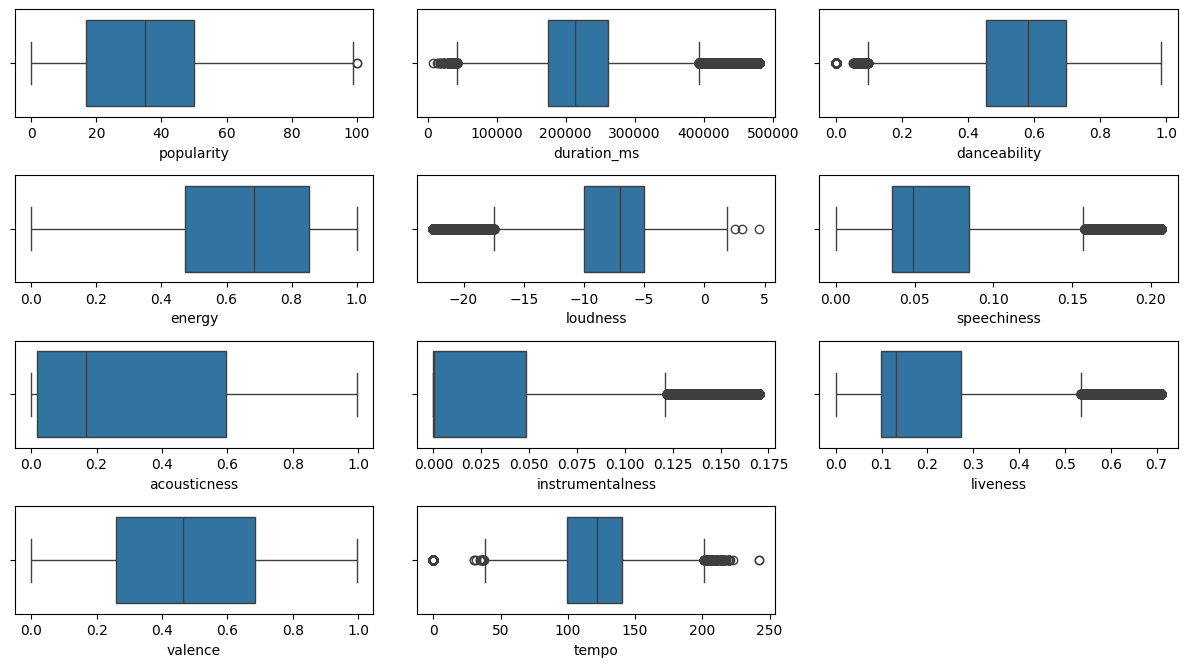

In [ ]:
plt.figure(figsize=(12,8))
t=1
for i in num_col:
    plt.subplot(5,3,t)
    sns.boxplot(data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

The box plot indicates a reduction in the number of outliers.

# **Kruskal-Wallis Test for Popularity Distribution Across Genres**
> To understand how popularity varies among different music genres, it is crucial to determine if there are statistically significant differences in the distribution of popularity scores across genres. The Kruskal-Wallis test is employed to assess whether these differences are significant given the non-parametric nature of our data.

The Kruskal-Wallis test is ideal for comparing popularity scores across genres when the data isn't normally distributed. It handles multiple groups (like 121 genres) and doesn't require normality or equal variances, unlike ANOVA.

**Hypothesis:**


> * **Null Hypothesis (H0):** The distributions of popularity are identical across all genres. This means there is no significant difference in the popularity scores among the different genres.
* **Alternative Hypothesis (H1):** At least one genre has a significantly different distribution of popularity compared to the others. This suggests that the popularity scores vary significantly among the genres.





In [ ]:
kruskal_results = {}
alpha = 0.05
for column in num_col:
    # Group data by genre
    groups = [group[column].values for name, group in data.groupby('genre')]
    stat, p_value = kruskal(*groups)
    kruskal_results[column] = {'Test Statistic': stat, 'P-value': p_value}

for column, result in kruskal_results.items():
    print(f'{column}:')
    print(f'  Test Statistic: {result["Test Statistic"]}')
    print(f'  P-value: {result["P-value"]}')

    if result["P-value"] < alpha:
        print(f'  Result at 95% confidence: Reject the null hypothesis. There is a significant difference in {column} among genres.')
    else:
        print(f'  Result at 95% confidence: Fail to reject the null hypothesis. There is no significant difference in {column} among genres.')
    print()


popularity:
  Test Statistic: 31313.145927194375
  P-value: 0.0
  Result at 95% confidence: Reject the null hypothesis. There is a significant difference in popularity among genres.

duration_ms:
  Test Statistic: 28785.39873568757
  P-value: 0.0
  Result at 95% confidence: Reject the null hypothesis. There is a significant difference in duration_ms among genres.

danceability:
  Test Statistic: 44121.624605063946
  P-value: 0.0
  Result at 95% confidence: Reject the null hypothesis. There is a significant difference in danceability among genres.

energy:
  Test Statistic: 49493.21133712971
  P-value: 0.0
  Result at 95% confidence: Reject the null hypothesis. There is a significant difference in energy among genres.

loudness:
  Test Statistic: 42429.34697084008
  P-value: 0.0
  Result at 95% confidence: Reject the null hypothesis. There is a significant difference in loudness among genres.

speechiness:
  Test Statistic: 25319.739747747488
  P-value: 0.0
  Result at 95% confidence: R

### ***Inference:***


> The Kruskal-Wallis test reveals significant differences in all numerical features across genres, indicating that each genre has distinct musical characteristics. This highlights the influence of genre on various musical attributes.



# **Modeling Music Attributes for Prediction**

### **Transitioning from Regression to Classification with Binned Popularity:**
We modified the popularity column by binning it into four categories to transition from predicting exact scores (regression) to predicting categorical outcomes (classification). This approach enhances model performance and interpretability. Binning the scores addresses variability, ensures a more balanced dataset, and enables the model to concentrate on broader trends. As a result, predictions become more stable and meaningful.

In [ ]:
data['popularity_class'] = 0
data['popularity_category'] = ''

# Assign classes and categories based on popularity ranges
data.loc[data['popularity'] <= 25, 'popularity_class'] = 0
data.loc[(data['popularity'] > 25) & (data['popularity'] <= 50), 'popularity_class'] = 1
data.loc[(data['popularity'] > 50) & (data['popularity'] <= 75), 'popularity_class'] = 2
data.loc[(data['popularity'] > 75) & (data['popularity'] <= 100), 'popularity_class'] = 3

data.loc[data['popularity'] <= 25, 'popularity_category'] = 'Low Popularity'
data.loc[(data['popularity'] > 25) & (data['popularity'] <= 50), 'popularity_category'] = 'Medium Popularity'
data.loc[(data['popularity'] > 50) & (data['popularity'] <= 75), 'popularity_category'] = 'High Popularity'
data.loc[(data['popularity'] > 75) & (data['popularity'] <= 100), 'popularity_category'] = 'Very High Popularity'

In [ ]:
#Final Data For Model
df=data.copy()
df.head(3)

,artist,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,popularity_class,popularity_category
0,0.000035,50.0,198250.0,0,0.563,0.4320,1,-7.862,1,0.0278,0.818,0.000008,0.1190,0.348,76.499,4,5,1,Medium Popularity
1,0.000088,53.0,275504.0,0,0.331,0.2350,4,-13.816,0,0.0411,0.891,0.000003,0.1070,0.252,82.511,4,5,2,High Popularity
2,0.000009,14.0,138680.0,0,0.226,0.0803,2,-21.048,0,0.0484,0.920,0.170100,0.0969,0.137,176.020,3,5,0,Low Popularity


In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00


**Base Model - Logistic Regression**

Confusion Matrix
 [[8914    0    0    0]
 [8293    0    0    0]
 [5141    0    0    0]
 [ 456    0    0    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.39      1.00      0.56      8914
           1       0.00      0.00      0.00      8293
           2       0.00      0.00      0.00      5141
           3       0.00      0.00      0.00       456

    accuracy                           0.39     22804
   macro avg       0.10      0.25      0.14     22804
weighted avg       0.15      0.39      0.22     22804

Accuracy: 0.39
Precision: 0.15
Recall: 0.39
F1 Score: 0.22
Cohen Kappa: 0.00


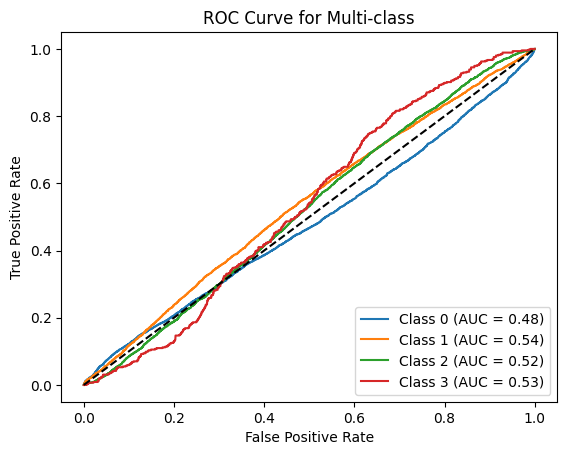

Button(description='Save Metrics', style=ButtonStyle())

                  Model  Accuracy  Precision    Recall  F1 Score  Cohen Kappa
0  LogisticRegression()  0.390896     0.1528  0.390896  0.219714          0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,
                             recall_score, precision_score, f1_score, cohen_kappa_score,
                             roc_curve, roc_auc_score)
from sklearn.preprocessing import label_binarize
from ipywidgets import widgets
from IPython.display import display
import numpy as np
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Initialize global lists to store model performance metrics
mod = []
accu = []
prec = []
rec = []
f1 = []
cohen_kappa_scores = []

def model_validation(model, xtrain, ytrain, xtest, ytest):
    global mod, accu, prec, rec, f1, cohen_kappa_scores

    # Fit the model
    model.fit(xtrain, ytrain)

    # Predict the classes and probabilities
    pred_h = model.predict(xtest)
    pred_s = model.predict_proba(xtest)

    # Print confusion matrix and classification report
    print('Confusion Matrix\n', confusion_matrix(ytest, pred_h))
    print('Classification Report\n', classification_report(ytest, pred_h, zero_division=0))

    # Calculate metrics
    accuracy = accuracy_score(ytest, pred_h)

    # Suppress warnings for precision, recall, and F1 score
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", UndefinedMetricWarning)

        precision = precision_score(ytest, pred_h, average='weighted', zero_division=0)
        recall = recall_score(ytest, pred_h, average='weighted', zero_division=0)
        f1_score_val = f1_score(ytest, pred_h, average='weighted', zero_division=0)

    cohen_kappa = cohen_kappa_score(ytest, pred_h)

    # Print metrics
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1_score_val:.2f}')
    print(f'Cohen Kappa: {cohen_kappa:.2f}')

    # Plot ROC AUC Curve
    n_classes = pred_s.shape[1]
    ytest_binarized = label_binarize(ytest, classes=range(n_classes))  # Binarize the true labels
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytest_binarized[:, i], pred_s[:, i])
        roc_auc[i] = roc_auc_score(ytest_binarized[:, i], pred_s[:, i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-class')
    plt.legend(loc='lower right')
    plt.show()

    # Append metrics to global lists
    mod.append(str(model))
    accu.append(accuracy)
    prec.append(precision)
    rec.append(recall)
    f1.append(f1_score_val)
    cohen_kappa_scores.append(cohen_kappa)  # Append Cohen Kappa score

    # Ask user if they want to save the scorecard using ipywidgets
    save_button = widgets.Button(description="Save Metrics")
    display(save_button)

    def on_button_click(b):
        global scorecard
        scorecard = pd.DataFrame({
            'Model': mod,
            'Accuracy': accu,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1,
            'Cohen Kappa': cohen_kappa_scores
        })
        print(scorecard)

    save_button.on_click(on_button_click)

# Example usage
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and it already includes the 'popularity_category' column


# Select features and target variable
features = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'genre']
X = df[features]
y = df['popularity_class']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and validate a Random Forest Classifier

model_validation(LogisticRegression(),X_train,y_train,X_test,y_test)


**Random Forest Classifier**

Confusion Matrix
 [[7175 1413  306   20]
 [1342 6413  535    3]
 [ 776 1573 2775   17]
 [ 130   79   77  170]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      8914
           1       0.68      0.77      0.72      8293
           2       0.75      0.54      0.63      5141
           3       0.81      0.37      0.51       456

    accuracy                           0.73     22804
   macro avg       0.75      0.62      0.66     22804
weighted avg       0.73      0.73      0.72     22804

Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1 Score: 0.72
Cohen Kappa: 0.58


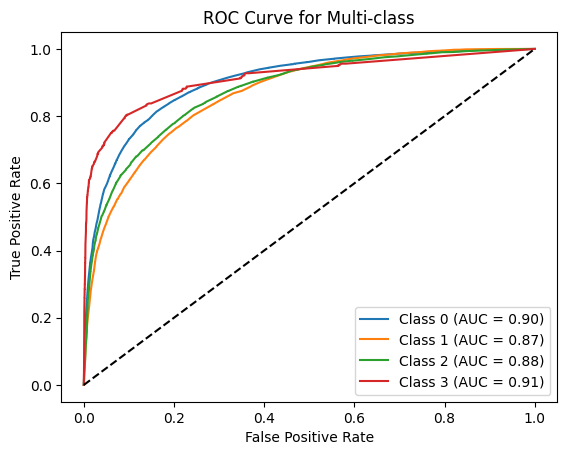

Button(description='Save Metrics', style=ButtonStyle())

                                     Model  Accuracy  Precision    Recall  \
0                     LogisticRegression()  0.390896   0.152800  0.390896   
1  RandomForestClassifier(random_state=42)  0.725004   0.729295  0.725004   

   F1 Score  Cohen Kappa  
0  0.219714     0.000000  
1  0.720218     0.577341  


In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
model_validation(rf_clf, X_train, y_train, X_test, y_test)

**Gaussian Naive Bayes**

Confusion Matrix
 [[5134 3780    0    0]
 [4043 4250    0    0]
 [2636 2505    0    0]
 [ 185  271    0    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.43      0.58      0.49      8914
           1       0.39      0.51      0.45      8293
           2       0.00      0.00      0.00      5141
           3       0.00      0.00      0.00       456

    accuracy                           0.41     22804
   macro avg       0.21      0.27      0.23     22804
weighted avg       0.31      0.41      0.35     22804

Accuracy: 0.41
Precision: 0.31
Recall: 0.41
F1 Score: 0.35
Cohen Kappa: 0.05


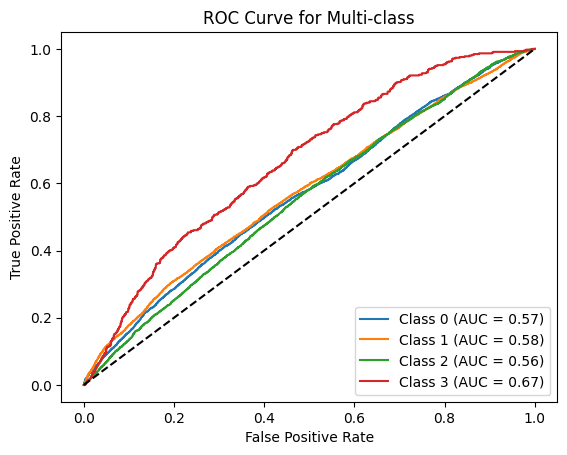

Button(description='Save Metrics', style=ButtonStyle())

                                     Model  Accuracy  Precision    Recall  \
0                     LogisticRegression()  0.390896   0.152800  0.390896   
1  RandomForestClassifier(random_state=42)  0.725004   0.729295  0.725004   
2                             GaussianNB()  0.411507   0.310296  0.411507   

   F1 Score  Cohen Kappa  
0  0.219714     0.000000  
1  0.720218     0.577341  
2  0.353783     0.053881  


In [ ]:
model_validation(GaussianNB(),X_train,y_train,X_test,y_test)

**Decision Tree Classifier**

Confusion Matrix
 [[6209 2695   10    0]
 [3383 4827   83    0]
 [2604 2359  178    0]
 [ 241  214    1    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.50      0.70      0.58      8914
           1       0.48      0.58      0.53      8293
           2       0.65      0.03      0.07      5141
           3       0.00      0.00      0.00       456

    accuracy                           0.49     22804
   macro avg       0.41      0.33      0.29     22804
weighted avg       0.52      0.49      0.43     22804

Accuracy: 0.49
Precision: 0.52
Recall: 0.49
F1 Score: 0.43
Cohen Kappa: 0.18


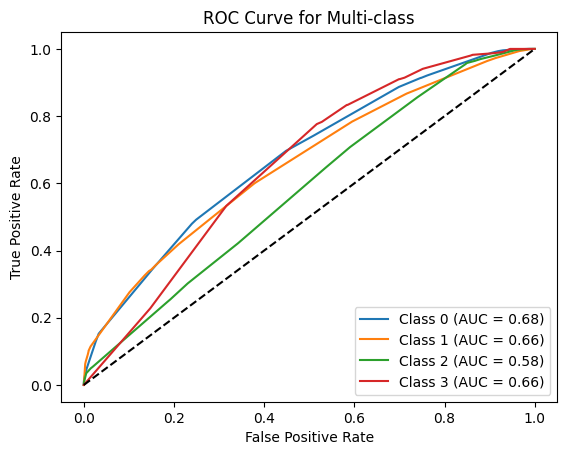

Button(description='Save Metrics', style=ButtonStyle())

                                     Model  Accuracy  Precision    Recall  \
0                     LogisticRegression()  0.390896   0.152800  0.390896   
1  RandomForestClassifier(random_state=42)  0.725004   0.729295  0.725004   
2                             GaussianNB()  0.411507   0.310296  0.411507   
3      DecisionTreeClassifier(max_depth=5)  0.491756   0.516571  0.491756   

   F1 Score  Cohen Kappa  
0  0.219714     0.000000  
1  0.720218     0.577341  
2  0.353783     0.053881  
3  0.433107     0.184372  


In [ ]:
model_validation(DecisionTreeClassifier(max_depth=5),
                X_train,y_train,X_test,y_test)

**Random Forest Classifier with Parameters**

Confusion Matrix
 [[6738 2166   10    0]
 [3190 5023   80    0]
 [2569 2397  175    0]
 [ 304  151    1    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.53      0.76      0.62      8914
           1       0.52      0.61      0.56      8293
           2       0.66      0.03      0.06      5141
           3       0.00      0.00      0.00       456

    accuracy                           0.52     22804
   macro avg       0.43      0.35      0.31     22804
weighted avg       0.54      0.52      0.46     22804

Accuracy: 0.52
Precision: 0.54
Recall: 0.52
F1 Score: 0.46
Cohen Kappa: 0.23


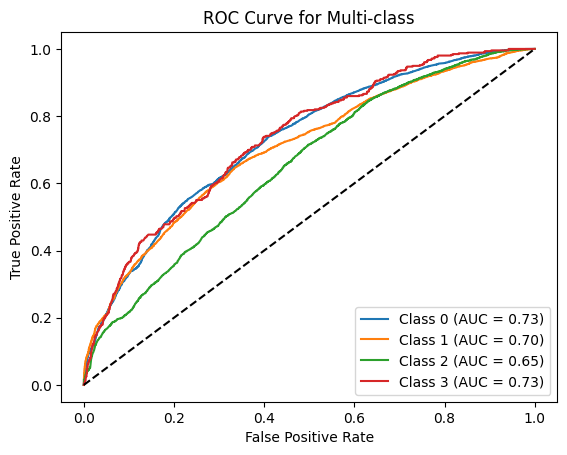

Button(description='Save Metrics', style=ButtonStyle())

                                               Model  Accuracy  Precision  \
0                               LogisticRegression()  0.390896   0.152800   
1            RandomForestClassifier(random_state=42)  0.725004   0.729295   
2                                       GaussianNB()  0.411507   0.310296   
3                DecisionTreeClassifier(max_depth=5)  0.491756   0.516571   
4  RandomForestClassifier(max_depth=5, max_featur...  0.523417   0.541674   

     Recall  F1 Score  Cohen Kappa  
0  0.390896  0.219714     0.000000  
1  0.725004  0.720218     0.577341  
2  0.411507  0.353783     0.053881  
3  0.491756  0.433107     0.184372  
4  0.523417  0.459805     0.234603  


In [ ]:
model_validation(RandomForestClassifier(n_estimators=150,max_features=11,max_depth=5),
                X_train,y_train,X_test,y_test)

**Ada Boost**

Confusion Matrix
 [[6582 2332    0    0]
 [4356 3937    0    0]
 [3381 1760    0    0]
 [ 342  114    0    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.45      0.74      0.56      8914
           1       0.48      0.47      0.48      8293
           2       0.00      0.00      0.00      5141
           3       0.00      0.00      0.00       456

    accuracy                           0.46     22804
   macro avg       0.23      0.30      0.26     22804
weighted avg       0.35      0.46      0.39     22804

Accuracy: 0.46
Precision: 0.35
Recall: 0.46
F1 Score: 0.39
Cohen Kappa: 0.13


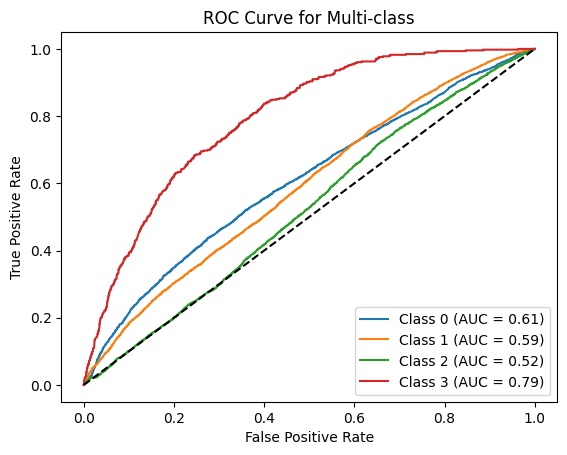

Button(description='Save Metrics', style=ButtonStyle())

                                               Model  Accuracy  Precision  \
0                               LogisticRegression()  0.390896   0.152800   
1            RandomForestClassifier(random_state=42)  0.725004   0.729295   
2                                       GaussianNB()  0.411507   0.310296   
3                DecisionTreeClassifier(max_depth=5)  0.491756   0.516571   
4  RandomForestClassifier(max_depth=5, max_featur...  0.523417   0.541674   
5  AdaBoostClassifier(learning_rate=0.1, n_estima...  0.461279   0.351317   

     Recall  F1 Score  Cohen Kappa  
0  0.390896  0.219714     0.000000  
1  0.725004  0.720218     0.577341  
2  0.411507  0.353783     0.053881  
3  0.491756  0.433107     0.184372  
4  0.523417  0.459805     0.234603  
5  0.461279  0.392493     0.129449  


In [ ]:
model_validation(AdaBoostClassifier(n_estimators=150,learning_rate=0.1),
                X_train,y_train,X_test,y_test)

**Gradient Boost**

Confusion Matrix
 [[7091 1359  450   14]
 [1502 5929  852   10]
 [1014 1583 2536    8]
 [ 200   50  121   85]]
Classification Report
               precision    recall  f1-score   support

           0       0.72      0.80      0.76      8914
           1       0.66      0.71      0.69      8293
           2       0.64      0.49      0.56      5141
           3       0.73      0.19      0.30       456

    accuracy                           0.69     22804
   macro avg       0.69      0.55      0.58     22804
weighted avg       0.68      0.69      0.68     22804

Accuracy: 0.69
Precision: 0.68
Recall: 0.69
F1 Score: 0.68
Cohen Kappa: 0.52


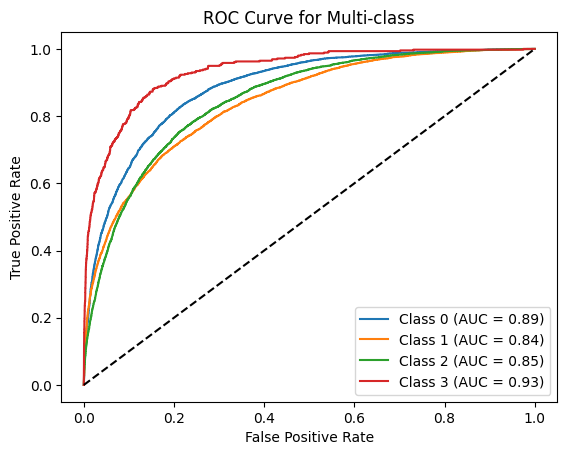

Button(description='Save Metrics', style=ButtonStyle())

                                               Model  Accuracy  Precision  \
0                               LogisticRegression()  0.390896   0.152800   
1            RandomForestClassifier(random_state=42)  0.725004   0.729295   
2                                       GaussianNB()  0.411507   0.310296   
3                DecisionTreeClassifier(max_depth=5)  0.491756   0.516571   
4  RandomForestClassifier(max_depth=5, max_featur...  0.523417   0.541674   
5  AdaBoostClassifier(learning_rate=0.1, n_estima...  0.461279   0.351317   
6            GradientBoostingClassifier(max_depth=7)  0.685888   0.683273   

     Recall  F1 Score  Cohen Kappa  
0  0.390896  0.219714     0.000000  
1  0.725004  0.720218     0.577341  
2  0.411507  0.353783     0.053881  
3  0.491756  0.433107     0.184372  
4  0.523417  0.459805     0.234603  
5  0.461279  0.392493     0.129449  
6  0.685888  0.678221     0.517037  


In [ ]:
model_validation(GradientBoostingClassifier(max_depth=7,n_estimators=100),
                X_train,y_train,X_test,y_test)

**XG BOOST**

Confusion Matrix
 [[7044 1596  274    0]
 [2005 5813  473    2]
 [1638 2050 1453    0]
 [ 275   86   92    3]]
Classification Report
               precision    recall  f1-score   support

           0       0.64      0.79      0.71      8914
           1       0.61      0.70      0.65      8293
           2       0.63      0.28      0.39      5141
           3       0.60      0.01      0.01       456

    accuracy                           0.63     22804
   macro avg       0.62      0.45      0.44     22804
weighted avg       0.63      0.63      0.60     22804

Accuracy: 0.63
Precision: 0.63
Recall: 0.63
F1 Score: 0.60
Cohen Kappa: 0.42


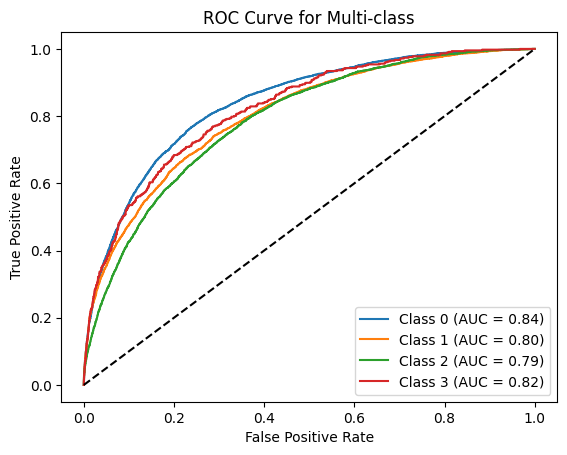

Button(description='Save Metrics', style=ButtonStyle())

                                               Model  Accuracy  Precision  \
0                               LogisticRegression()  0.390896   0.152800   
1            RandomForestClassifier(random_state=42)  0.725004   0.729295   
2                                       GaussianNB()  0.411507   0.310296   
3                DecisionTreeClassifier(max_depth=5)  0.491756   0.516571   
4  RandomForestClassifier(max_depth=5, max_featur...  0.523417   0.541674   
5  AdaBoostClassifier(learning_rate=0.1, n_estima...  0.461279   0.351317   
6            GradientBoostingClassifier(max_depth=7)  0.685888   0.683273   
7  XGBClassifier(base_score=None, booster=None, c...  0.627653   0.627575   

     Recall  F1 Score  Cohen Kappa  
0  0.390896  0.219714     0.000000  
1  0.725004  0.720218     0.577341  
2  0.411507  0.353783     0.053881  
3  0.491756  0.433107     0.184372  
4  0.523417  0.459805     0.234603  
5  0.461279  0.392493     0.129449  
6  0.685888  0.678221     0.517037  
7  0.62765

In [ ]:
model_validation(XGBClassifier(n_estimators=250,learning_rate=0.01,max_depth=7),
                 X_train,y_train,X_test,y_test)

**Voting**

In [ ]:
base_estimators = [('Decision Tree 1',DecisionTreeClassifier(max_depth=7)),
                   ('Decision Tree 2',DecisionTreeClassifier(max_depth=5)),
                  ('Random Forest 1',RandomForestClassifier(n_estimators=150,max_depth=5)),
                   ('Random Forest 2',RandomForestClassifier(n_estimators=200,max_depth=7)),
                  ('XGBoost',XGBClassifier(n_estimators=200,max_depth=5))]

In [ ]:
vc = VotingClassifier(estimators=base_estimators,voting='soft')
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('Decision Tree 1',
                              DecisionTreeClassifier(max_depth=7)),
                             ('Decision Tree 2',
                              DecisionTreeClassifier(max_depth=5)),
                             ('Random Forest 1',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=150)),
                             ('Random Forest 2',
                              RandomForestClassifier(max_depth=7,
                                                     n_estimators=200)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            co...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

Confusion Matrix
 [[7336 1515   63    0]
 [2201 5933  159    0]
 [2013 2257  871    0]
 [ 305  114   37    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.62      0.82      0.71      8914
           1       0.60      0.72      0.66      8293
           2       0.77      0.17      0.28      5141
           3       0.00      0.00      0.00       456

    accuracy                           0.62     22804
   macro avg       0.50      0.43      0.41     22804
weighted avg       0.64      0.62      0.58     22804

Accuracy: 0.62
Precision: 0.64
Recall: 0.62
F1 Score: 0.58
Cohen Kappa: 0.40


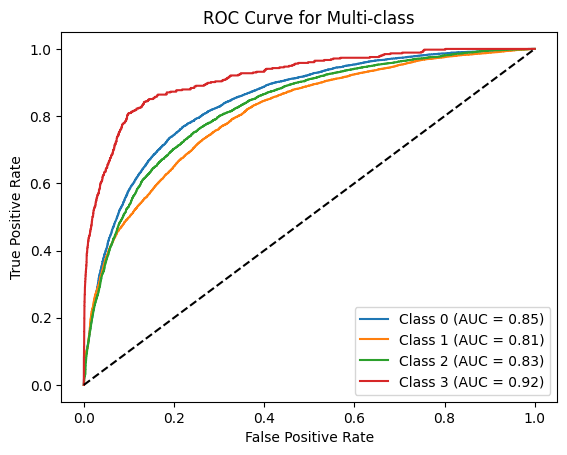

Button(description='Save Metrics', style=ButtonStyle())

                                               Model  Accuracy  Precision  \
0                               LogisticRegression()  0.390896   0.152800   
1            RandomForestClassifier(random_state=42)  0.725004   0.729295   
2                                       GaussianNB()  0.411507   0.310296   
3                DecisionTreeClassifier(max_depth=5)  0.491756   0.516571   
4  RandomForestClassifier(max_depth=5, max_featur...  0.523417   0.541674   
5  AdaBoostClassifier(learning_rate=0.1, n_estima...  0.461279   0.351317   
6            GradientBoostingClassifier(max_depth=7)  0.685888   0.683273   
7  XGBClassifier(base_score=None, booster=None, c...  0.627653   0.627575   
8  VotingClassifier(estimators=[('Decision Tree 1...  0.620067   0.635401   

     Recall  F1 Score  Cohen Kappa  
0  0.390896  0.219714     0.000000  
1  0.725004  0.720218     0.577341  
2  0.411507  0.353783     0.053881  
3  0.491756  0.433107     0.184372  
4  0.523417  0.459805     0.234603  
5  0.46

In [ ]:
model_validation(VotingClassifier(estimators=base_estimators,voting='soft'),
                X_train,y_train,X_test,y_test)

**Stacking**

In [ ]:
sc = StackingClassifier(estimators=base_estimators,
                       final_estimator=DecisionTreeClassifier(max_depth=5),
                       cv=7)

In [ ]:
sc.fit(X_train,y_train)

StackingClassifier(cv=7,
                   estimators=[('Decision Tree 1',
                                DecisionTreeClassifier(max_depth=7)),
                               ('Decision Tree 2',
                                DecisionTreeClassifier(max_depth=5)),
                               ('Random Forest 1',
                                RandomForestClassifier(max_depth=5,
                                                       n_estimators=150)),
                               ('Random Forest 2',
                                RandomForestClassifier(max_depth=7,
                                                       n_estimators=200)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=DecisionTreeClassifier(max_depth=5))

Confusion Matrix
 [[7053 1313  518   30]
 [1431 5829 1031    2]
 [ 805 1469 2844   23]
 [ 156   35  135  130]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      8914
           1       0.67      0.70      0.69      8293
           2       0.63      0.55      0.59      5141
           3       0.70      0.29      0.41       456

    accuracy                           0.70     22804
   macro avg       0.69      0.58      0.61     22804
weighted avg       0.69      0.70      0.69     22804

Accuracy: 0.70
Precision: 0.69
Recall: 0.70
F1 Score: 0.69
Cohen Kappa: 0.54


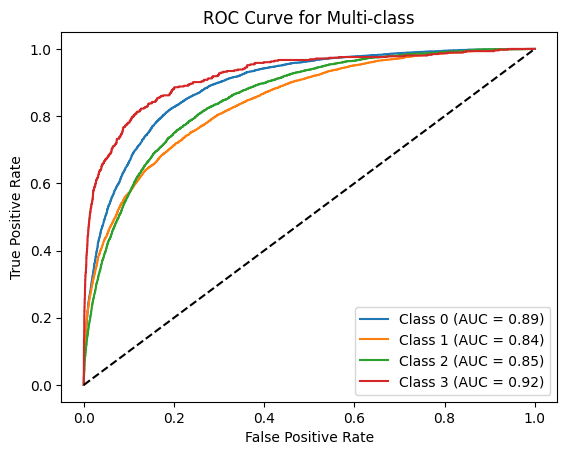

Button(description='Save Metrics', style=ButtonStyle())

                                               Model  Accuracy  Precision  \
0                               LogisticRegression()  0.390896   0.152800   
1            RandomForestClassifier(random_state=42)  0.725004   0.729295   
2                                       GaussianNB()  0.411507   0.310296   
3                DecisionTreeClassifier(max_depth=5)  0.491756   0.516571   
4  RandomForestClassifier(max_depth=5, max_featur...  0.523417   0.541674   
5  AdaBoostClassifier(learning_rate=0.1, n_estima...  0.461279   0.351317   
6            GradientBoostingClassifier(max_depth=7)  0.685888   0.683273   
7  XGBClassifier(base_score=None, booster=None, c...  0.627653   0.627575   
8  VotingClassifier(estimators=[('Decision Tree 1...  0.620067   0.635401   
9  StackingClassifier(cv=7,\n                   e...  0.695317   0.692727   

     Recall  F1 Score  Cohen Kappa  
0  0.390896  0.219714     0.000000  
1  0.725004  0.720218     0.577341  
2  0.411507  0.353783     0.053881  
3  0

In [ ]:
model_validation(StackingClassifier(estimators=base_estimators,cv=7),
                X_train,y_train,X_test,y_test)

Using **Randomized Search CV** for finding best parameters for RandomForest Classifier as Random Forest Classifier has provided the
best results.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Ensure y_train is a numpy array or similar
y_train = np.array(y_train)

# Define the model
rf_clf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_dist = {'n_estimators': [70, 100, 120],
              'max_features': [9, 10, 11],
              'max_depth': [7, 8, 9, 10]}

# Define the scoring function
scorer = make_scorer(f1_score, average='weighted')

# Use a subset of the data for faster computation (e.g., 20% of the original data)
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42, stratify=y_train)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist, scoring=scorer, cv=3, n_iter=10, random_state=42)

# Perform the random search on the subset
random_search.fit(X_train_sub, y_train_sub)

# Print the best parameters and the corresponding score
print(f'Best parameters found: {random_search.best_params_}')
print(f'Best F1 Score: {random_search.best_score_:.2f}')


Best parameters found: {'n_estimators': 120, 'max_features': 11, 'max_depth': 10}
Best F1 Score: 0.58


Confusion Matrix
 [[7017 1622  275    0]
 [2092 5783  418    0]
 [1736 2073 1332    0]
 [ 280   85   91    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.63      0.79      0.70      8914
           1       0.60      0.70      0.65      8293
           2       0.63      0.26      0.37      5141
           3       0.00      0.00      0.00       456

    accuracy                           0.62     22804
   macro avg       0.47      0.44      0.43     22804
weighted avg       0.61      0.62      0.59     22804

Accuracy: 0.62
Precision: 0.61
Recall: 0.62
F1 Score: 0.59
Cohen Kappa: 0.40


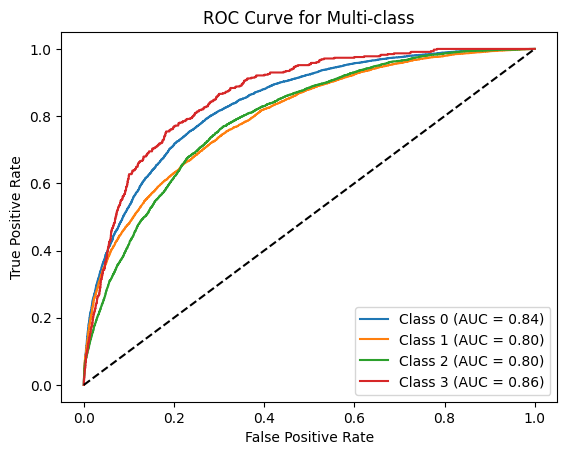

Button(description='Save Metrics', style=ButtonStyle())

                                                Model  Accuracy  Precision  \
0                                LogisticRegression()  0.390896   0.152800   
1             RandomForestClassifier(random_state=42)  0.725004   0.729295   
2                                        GaussianNB()  0.411507   0.310296   
3                 DecisionTreeClassifier(max_depth=5)  0.491756   0.516571   
4   RandomForestClassifier(max_depth=5, max_featur...  0.523417   0.541674   
5   AdaBoostClassifier(learning_rate=0.1, n_estima...  0.461279   0.351317   
6             GradientBoostingClassifier(max_depth=7)  0.685888   0.683273   
7   XGBClassifier(base_score=None, booster=None, c...  0.627653   0.627575   
8   VotingClassifier(estimators=[('Decision Tree 1...  0.620067   0.635401   
9   StackingClassifier(cv=7,\n                   e...  0.695317   0.692727   
10  RandomForestClassifier(max_depth=10, max_featu...  0.619716   0.608386   

      Recall  F1 Score  Cohen Kappa  
0   0.390896  0.219714   

In [ ]:
model_validation(RandomForestClassifier(max_depth=10,max_features=11,n_estimators=120),
                X_train,y_train,X_test,y_test)


### **Model Performance Summary**

**RandomForestClassifier (random_state=42):**
> This model excels with 0.73 accuracy, 0.73 precision, 0.73 recall, and 0.72 F1 Score. It also achieves the highest Cohen Kappa of 0.58, indicating excellent agreement between predicted and actual values. It’s the top choice for final selection due to its strong performance across all metrics.


**GradientBoostingClassifier (max_depth=7):**

> This model performs well with 0.69 accuracy, 0.68 precision, 0.69 recall, and 0.68 F1 Score. It also has a high Cohen Kappa of 0.52, showing good predictive agreement. It's a strong candidate if you want reliable performance with high metric scores.

**StackingClassifier:**
> It combines multiple models, offering a robust performance with 0.70 accuracy, 0.69 precision, 0.70 recall, and 0.69 F1 Score. Its Cohen Kappa of 0.54 further supports its effectiveness.



*After evaluating multiple models, the RandomForestClassifier (random_state=42) has been finalized as the best choice. It demonstrates superior performance across all key metrics. Additionally, it has the highest Cohen Kappa.This model's strong overall performance makes it the most suitable for final deployment. Further steps should include model deployment*

In [ ]:
final_model = RandomForestClassifier(random_state=42)

In [ ]:
final_model.fit(X_train, y_train)

# Predict on the test set
final_predictions = final_model.predict(X_test)

# Evaluate the final model
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, average='weighted')
recall = recall_score(y_test, final_predictions, average='weighted')
f1_score_val = f1_score(y_test, final_predictions, average='weighted')
cohen_kappa = cohen_kappa_score(y_test, final_predictions)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score_val:.2f}')
print(f'Cohen Kappa: {cohen_kappa:.2f}')

# Print confusion matrix and classification report
print('Confusion Matrix\n', confusion_matrix(y_test, final_predictions))
print('Classification Report\n', classification_report(y_test, final_predictions))

Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1 Score: 0.72
Cohen Kappa: 0.58
Confusion Matrix
 [[7175 1413  306   20]
 [1342 6413  535    3]
 [ 776 1573 2775   17]
 [ 130   79   77  170]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      8914
           1       0.68      0.77      0.72      8293
           2       0.75      0.54      0.63      5141
           3       0.81      0.37      0.51       456

    accuracy                           0.73     22804
   macro avg       0.75      0.62      0.66     22804
weighted avg       0.73      0.73      0.72     22804



# **Deployment**

In [ ]:
import joblib

# Save the model to the specified path
model_path = '/content/drive/MyDrive/Capstone/EDA/Final_random_forest_model.joblib'
joblib.dump(final_model, model_path)

['/content/drive/MyDrive/Capstone/EDA/Final_random_forest_model.joblib']

In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2
